In [1]:
# 📊 Veri İşleme ve Temizleme
import pandas as pd
import numpy as np

# 📈 Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns


# ⚠️ Uyarı gizleme
import warnings

# 🧪 Makine Öğrenmesi - Modelleme
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# ✅ Model Değerlendirme
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔢 Kategorik verileri işlemek
from sklearn.preprocessing import LabelEncoder


In [2]:
df =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["SeniorCitizen"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [6]:
#benzersiz değerleri listeleme
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [7]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [8]:
unique_value_count= {col:df[col].value_counts() for col in df.columns}

for col, value_count in unique_value_count.items():
    print(f"Kolon: {col}") 
    print(value_count) 
    print("\n")

Kolon: customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


Kolon: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64


Kolon: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Kolon: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Kolon: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Kolon: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


Kolon: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Kolon: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Kolon: InternetService
InternetService
Fi

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.loc[df.Churn=='No','Churn']  = 0 
df.loc[df.Churn=='Yes','Churn']  = 1 

In [11]:
dataset = df["Churn"].value_counts()
print(dataset)

Churn
0    5174
1    1869
Name: count, dtype: int64


In [12]:
df1 =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [13]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    df[c] = pd.factorize(df[c])[0]

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,4,1


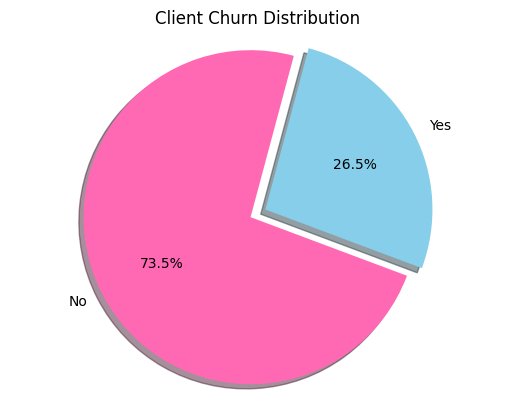

In [14]:
import matplotlib.pyplot as plt


size = df["Churn"].value_counts()
labels = "No","Yes"
explode =  (0, 0.1)
colors = ["hotpink", "#87ceeb"]

plt.pie(size, labels= labels, explode=explode, autopct='%1.1f%%', startangle= 75, shadow=True, colors =  colors)
plt.axis("equal") # daha oratılı olması için
plt.title("Client Churn Distribution")

#plt.legend(labels)
plt.show()

müşterinin cinsiyetine göre ne kadar churn eden olmuş onu bulmalıyız. 

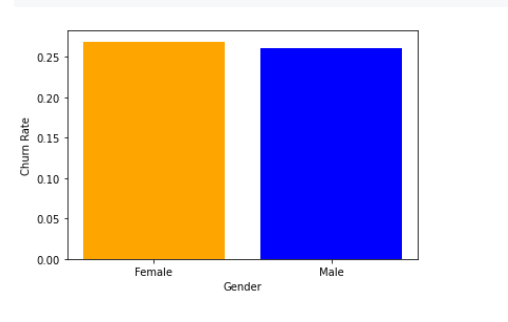

Grafikte bunu nasıl gösterebiliriz? 
* öncelikle datasetten hangi değişkenlerin arasındaki bağlantıyı göstermek istiyoruz -> churn ve gender

* grafiğimizin x ve y ekseni ne olacak

* ne grafiği oluşturacağız

* görsel olarak ekranda hangi bilgileri göstermek istiyoruz.
  

In [15]:
df.groupby('gender').Churn.mean()

gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64

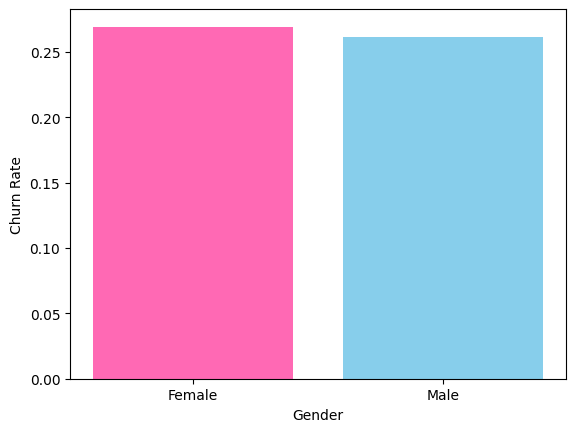

In [16]:
# create a dataset
Churn_Mean = df.groupby('gender').Churn.mean()
Gender = ('Female', 'Male')

x_pos = np.arange(len(Churn_Mean))

# Create bars with different colors
plt.bar(x_pos, Churn_Mean,color=["hotpink", "#87ceeb"])

# Create names on the x-axis MAle Female yazısı alttaki
plt.xticks(x_pos, Gender)


# Add title and axis names
#plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
#plt.legend()

# Show graph
plt.show()

Kadınlar erkeklerden biraz daha fazla churn oranına sahipler. 


In [17]:
catvars = df1.columns.tolist()

In [18]:
catvars

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [19]:
catvars = [ e for e in catvars if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]

In [20]:
catvars

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [21]:
import seaborn as sns


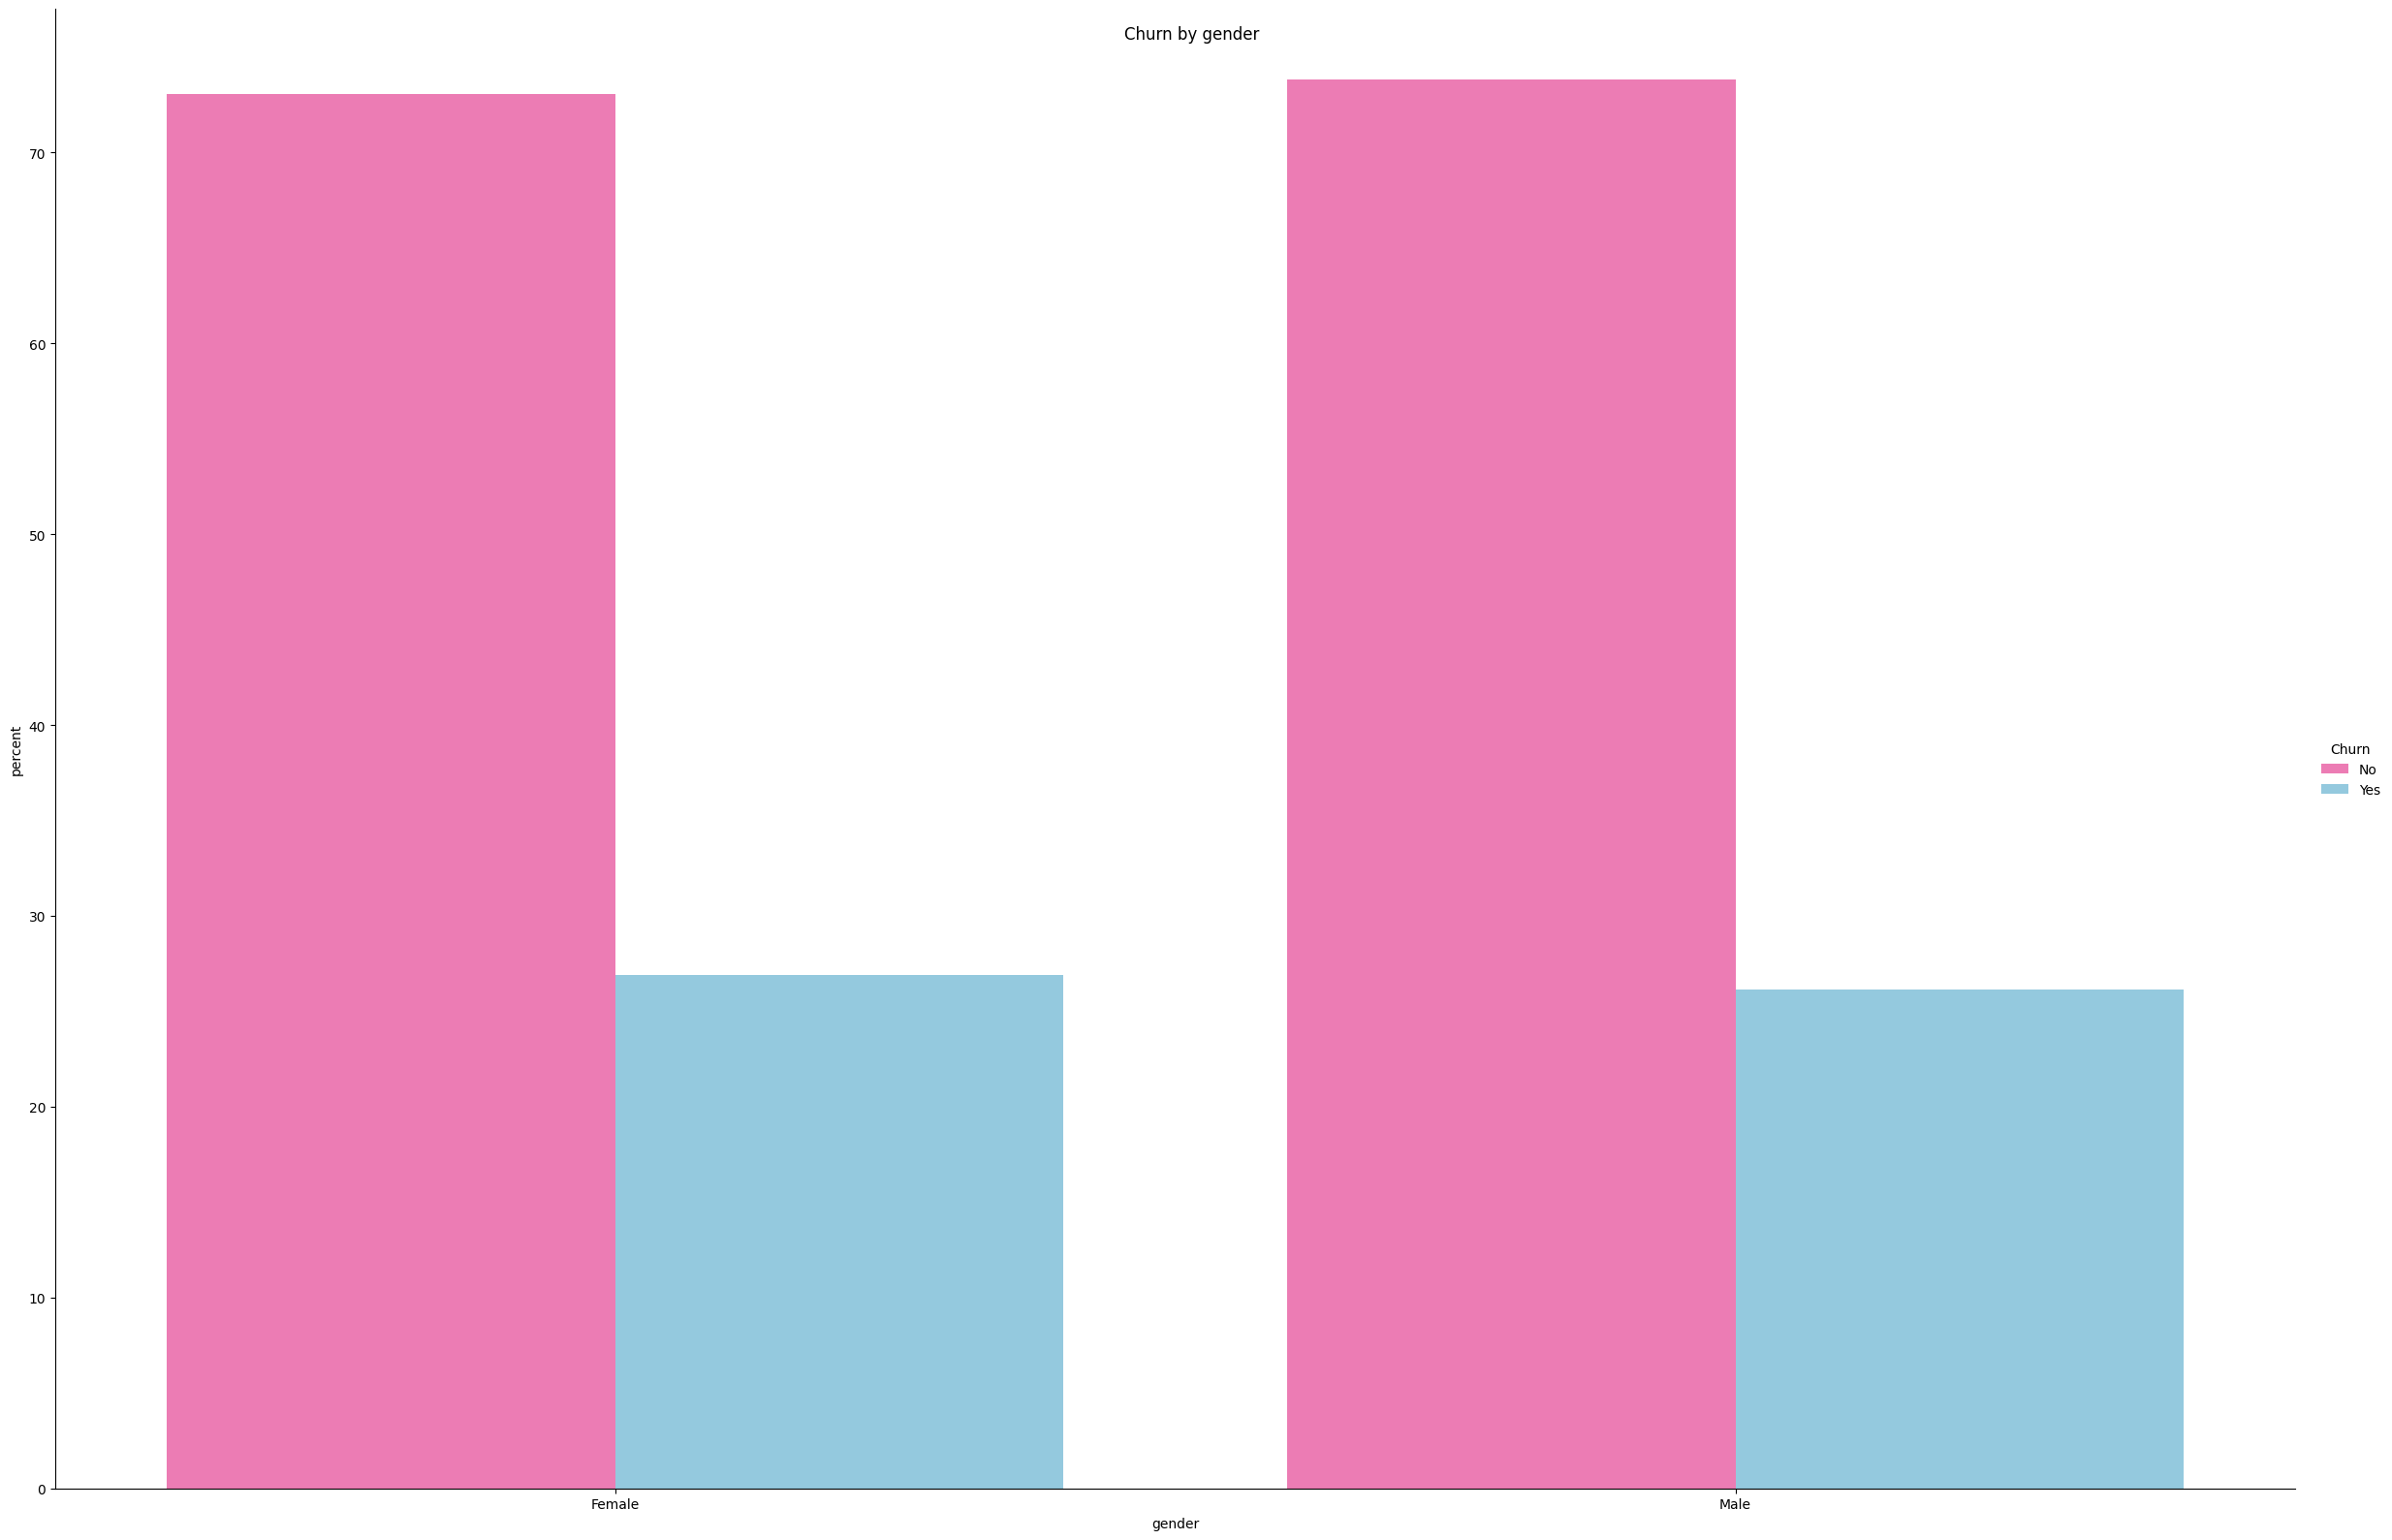

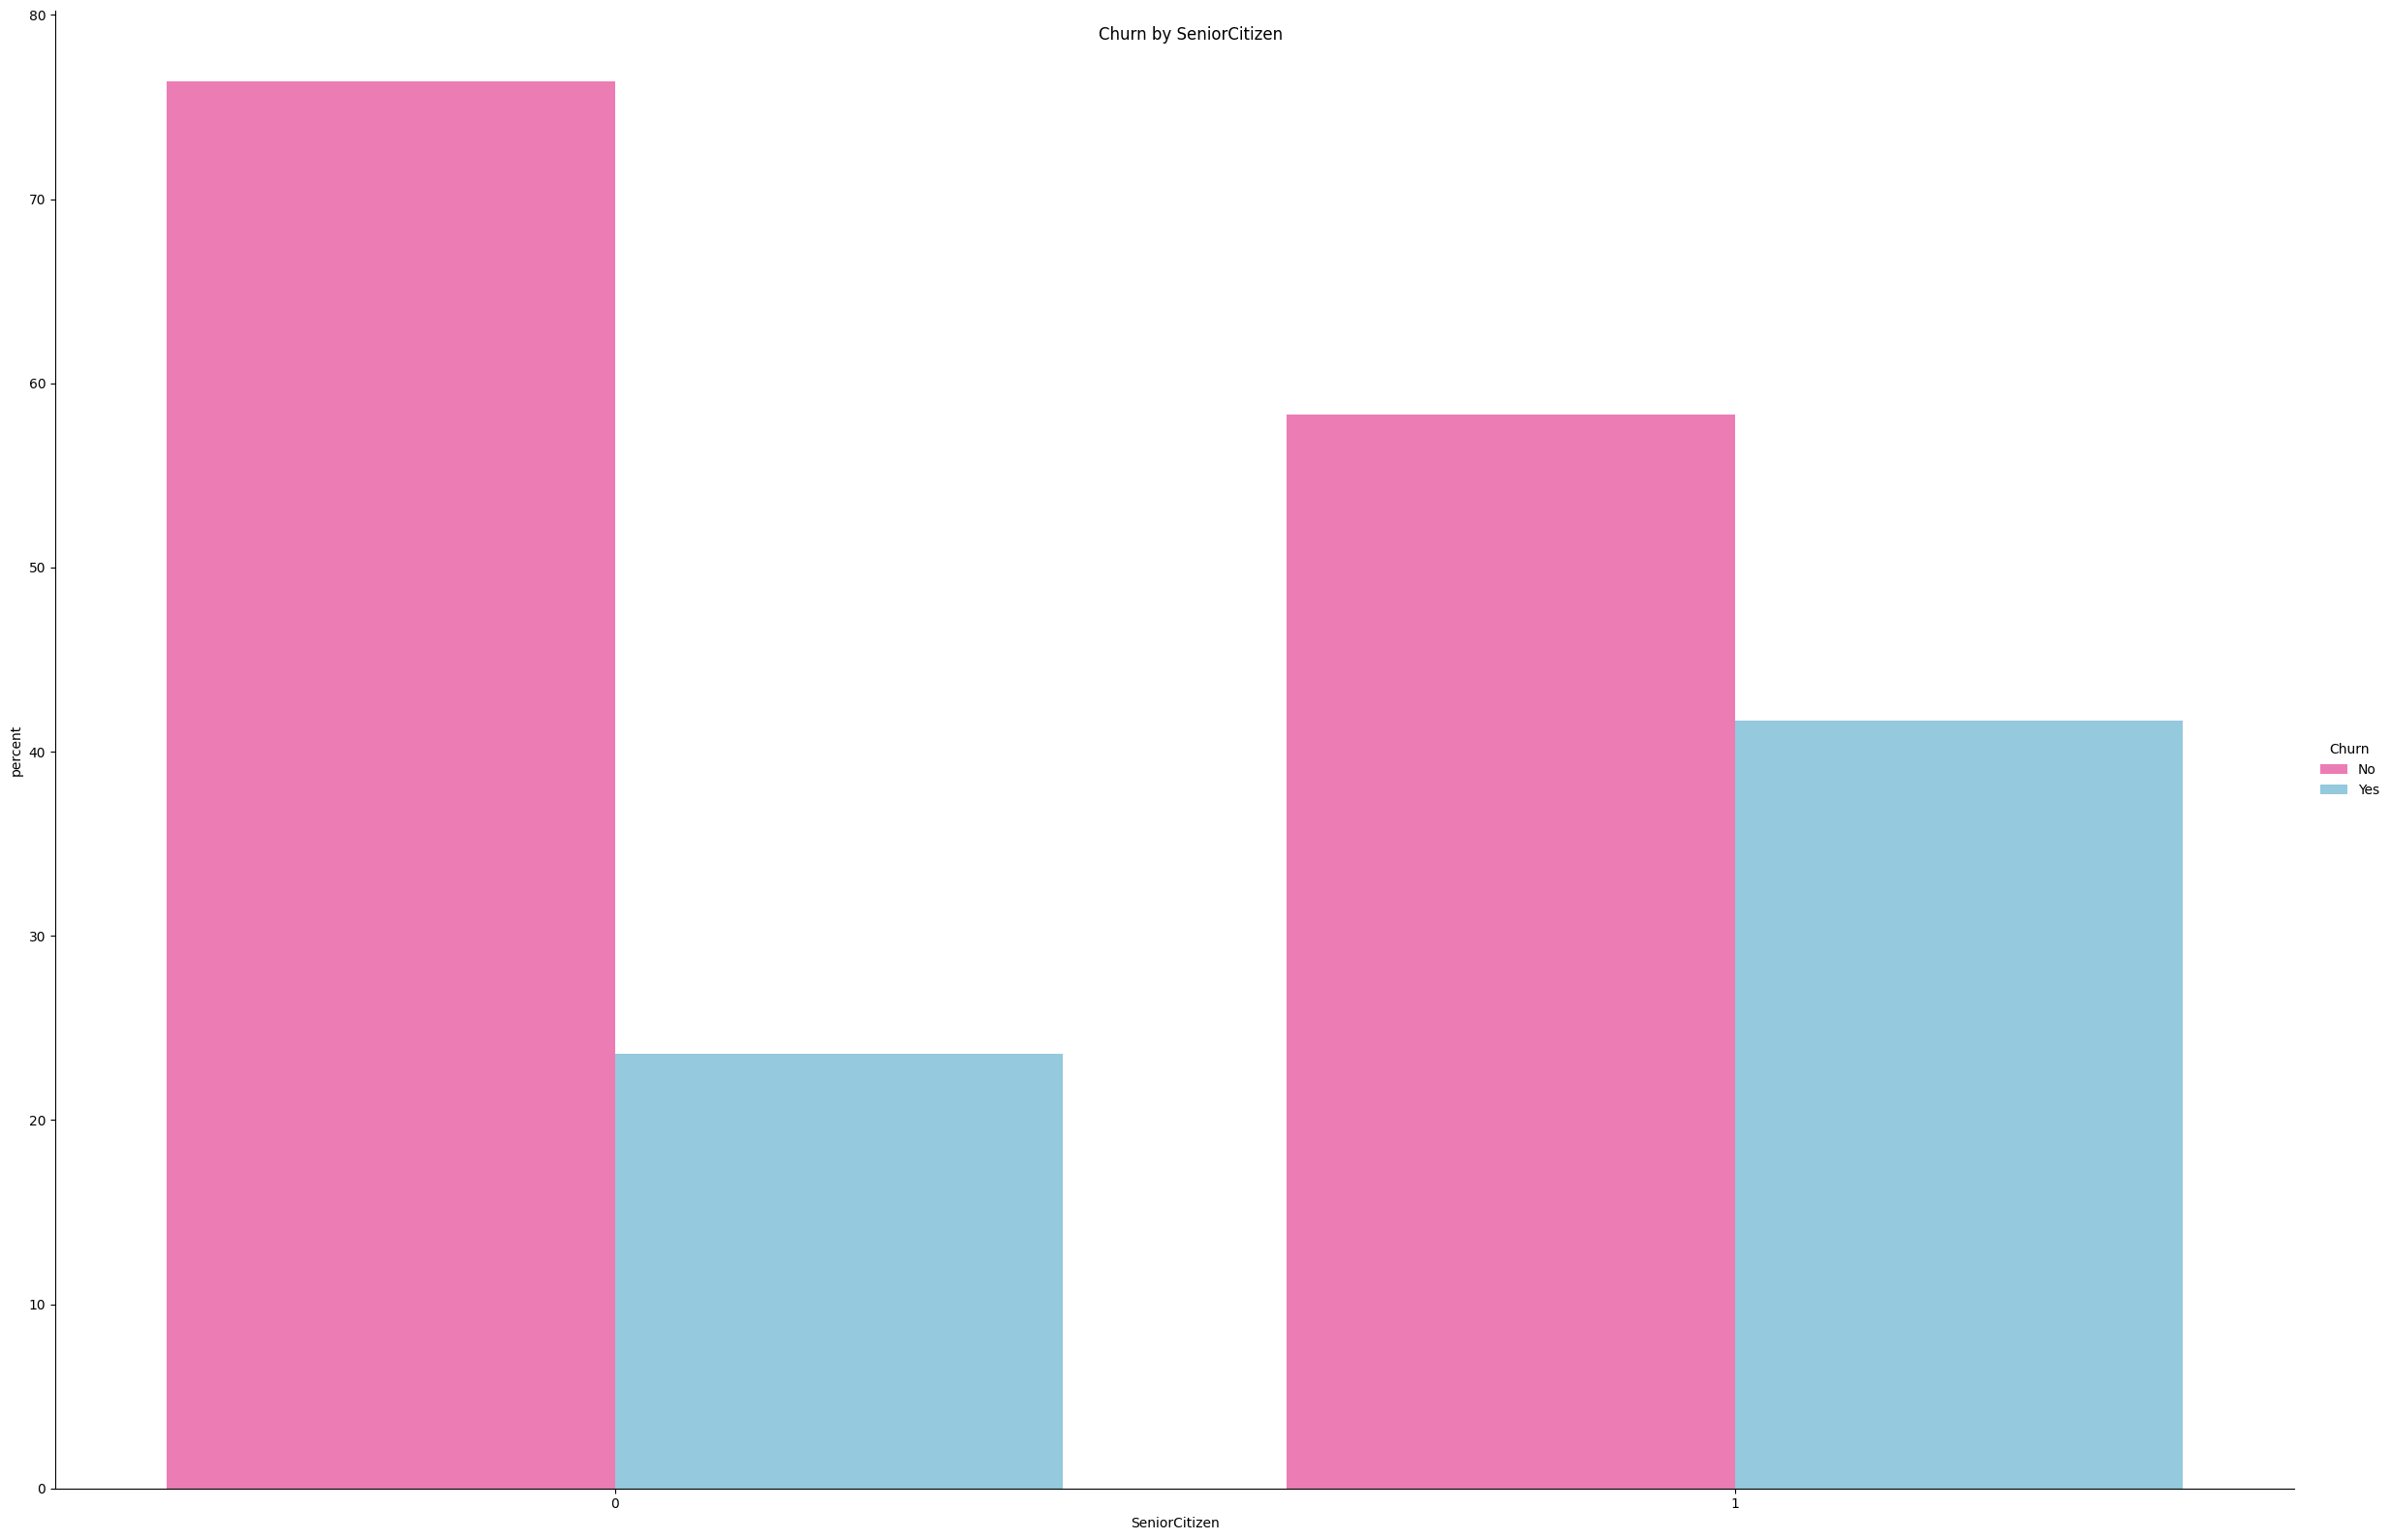

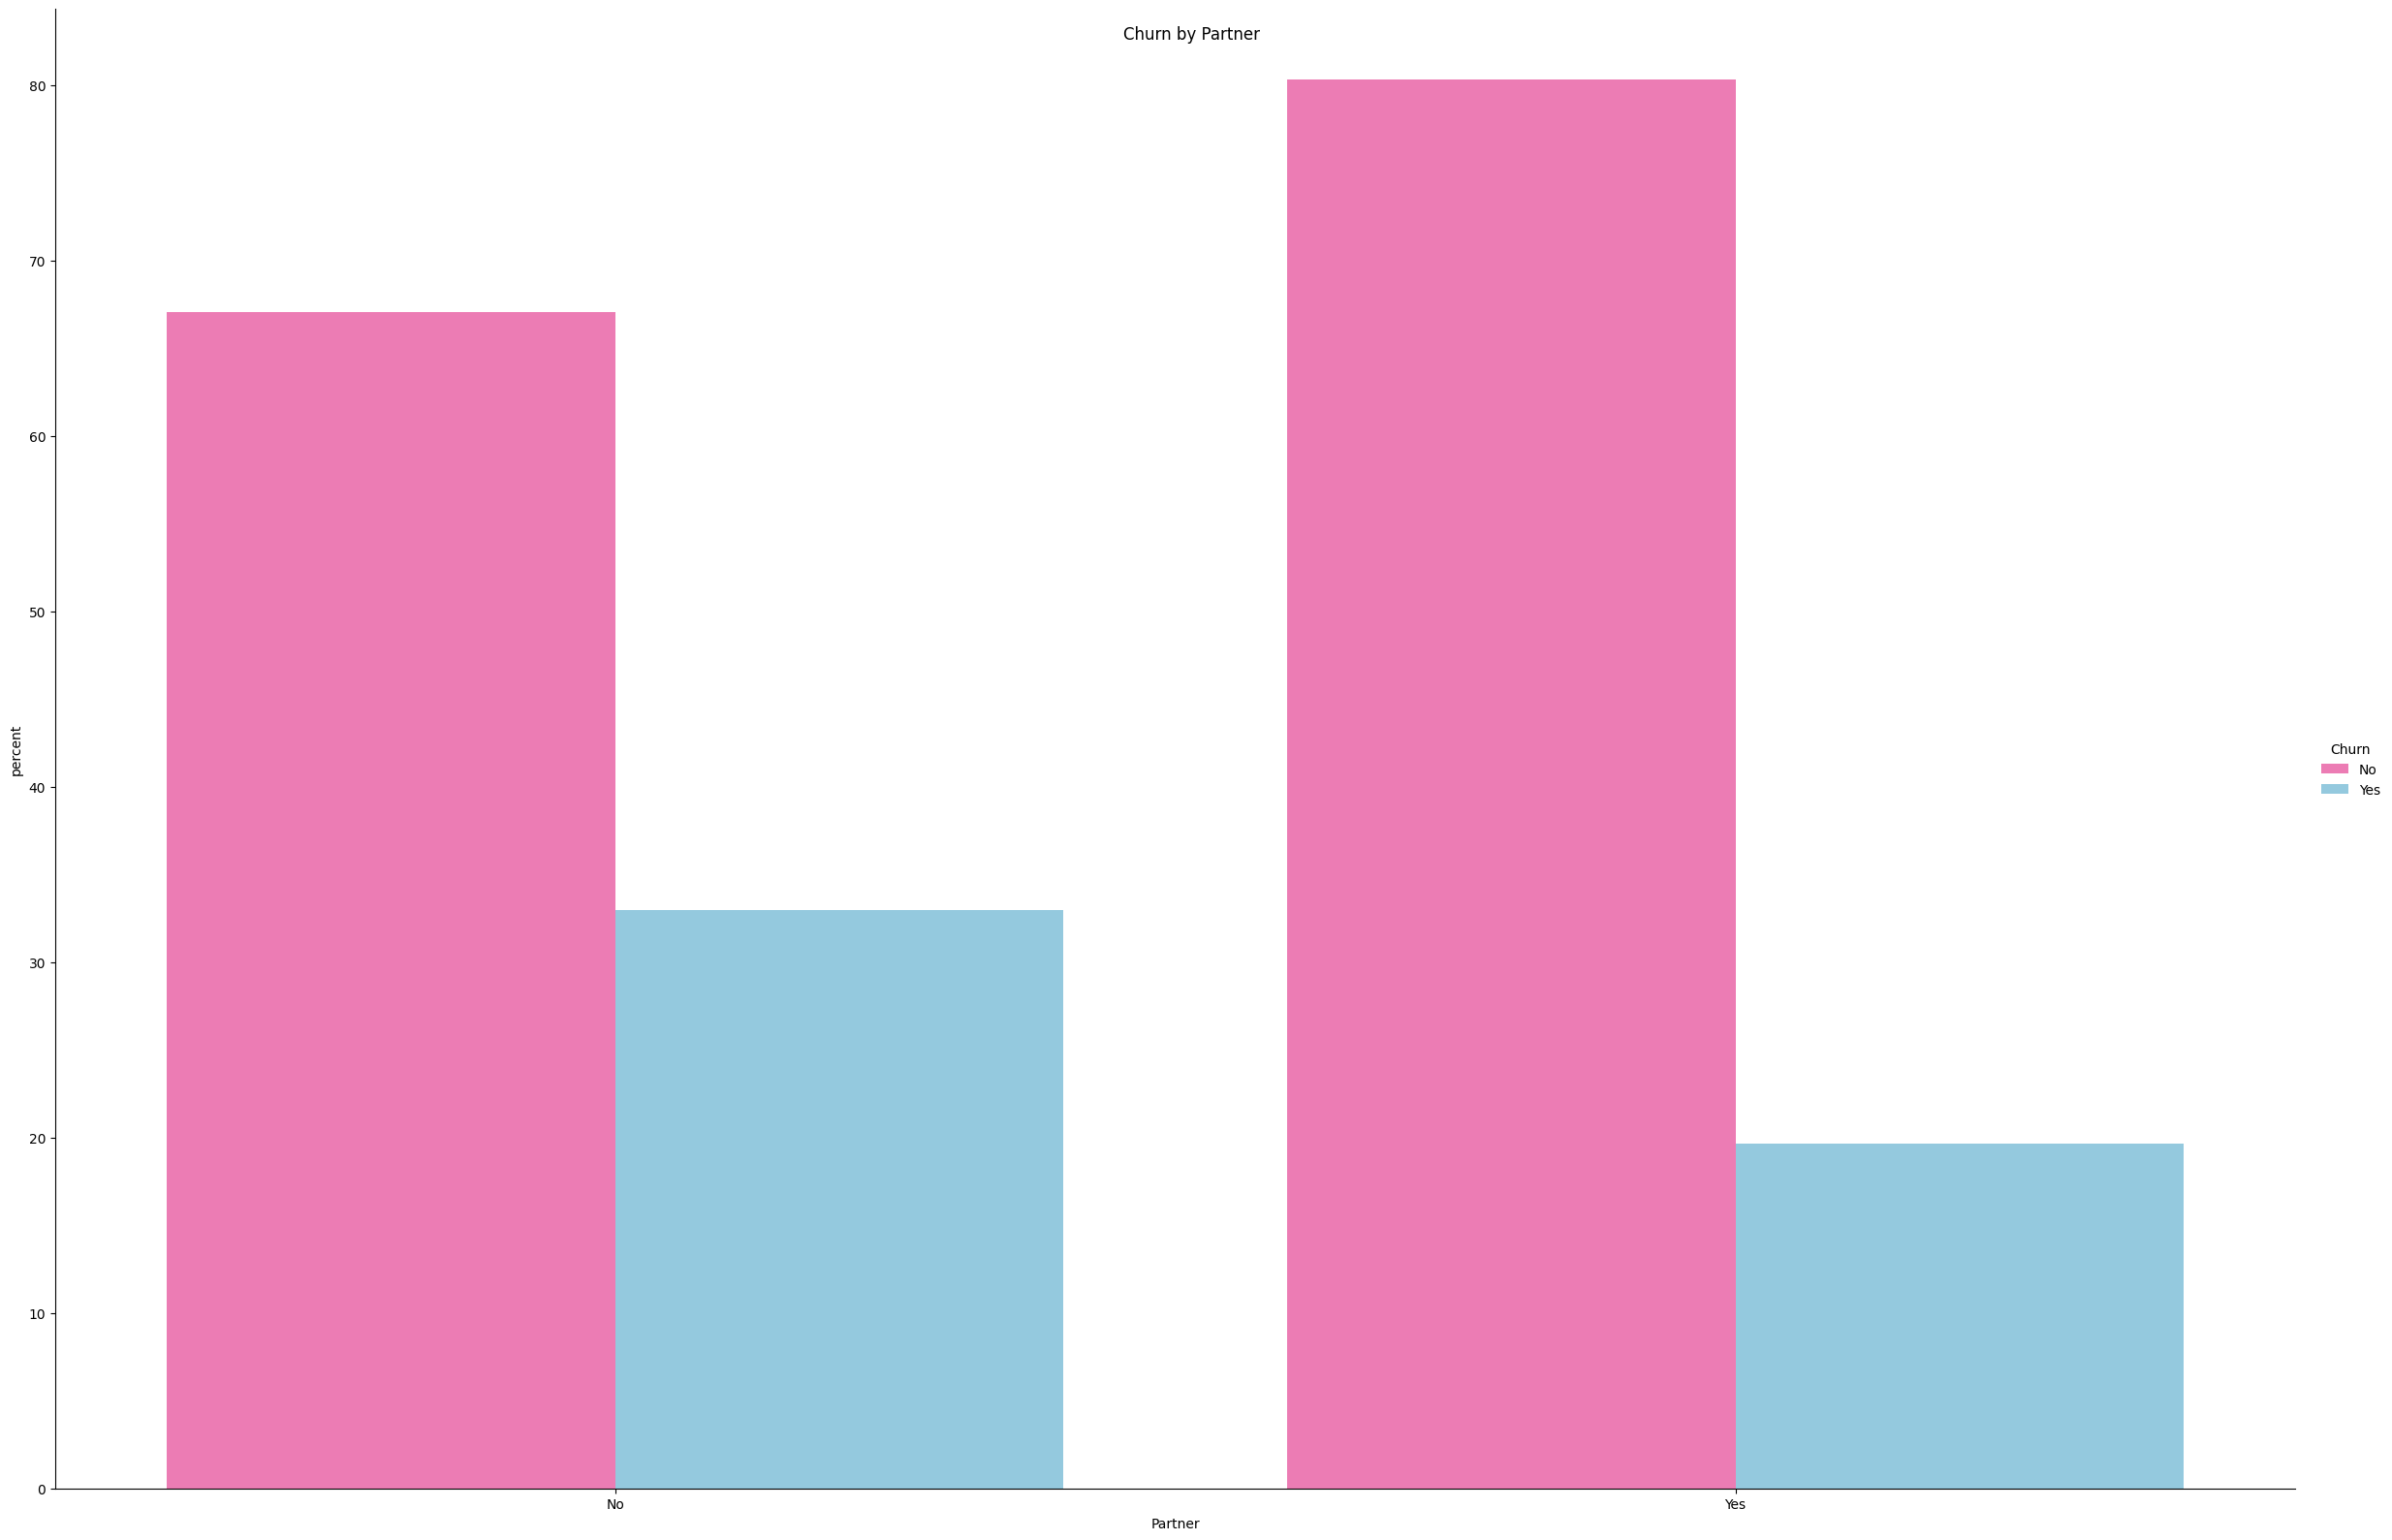

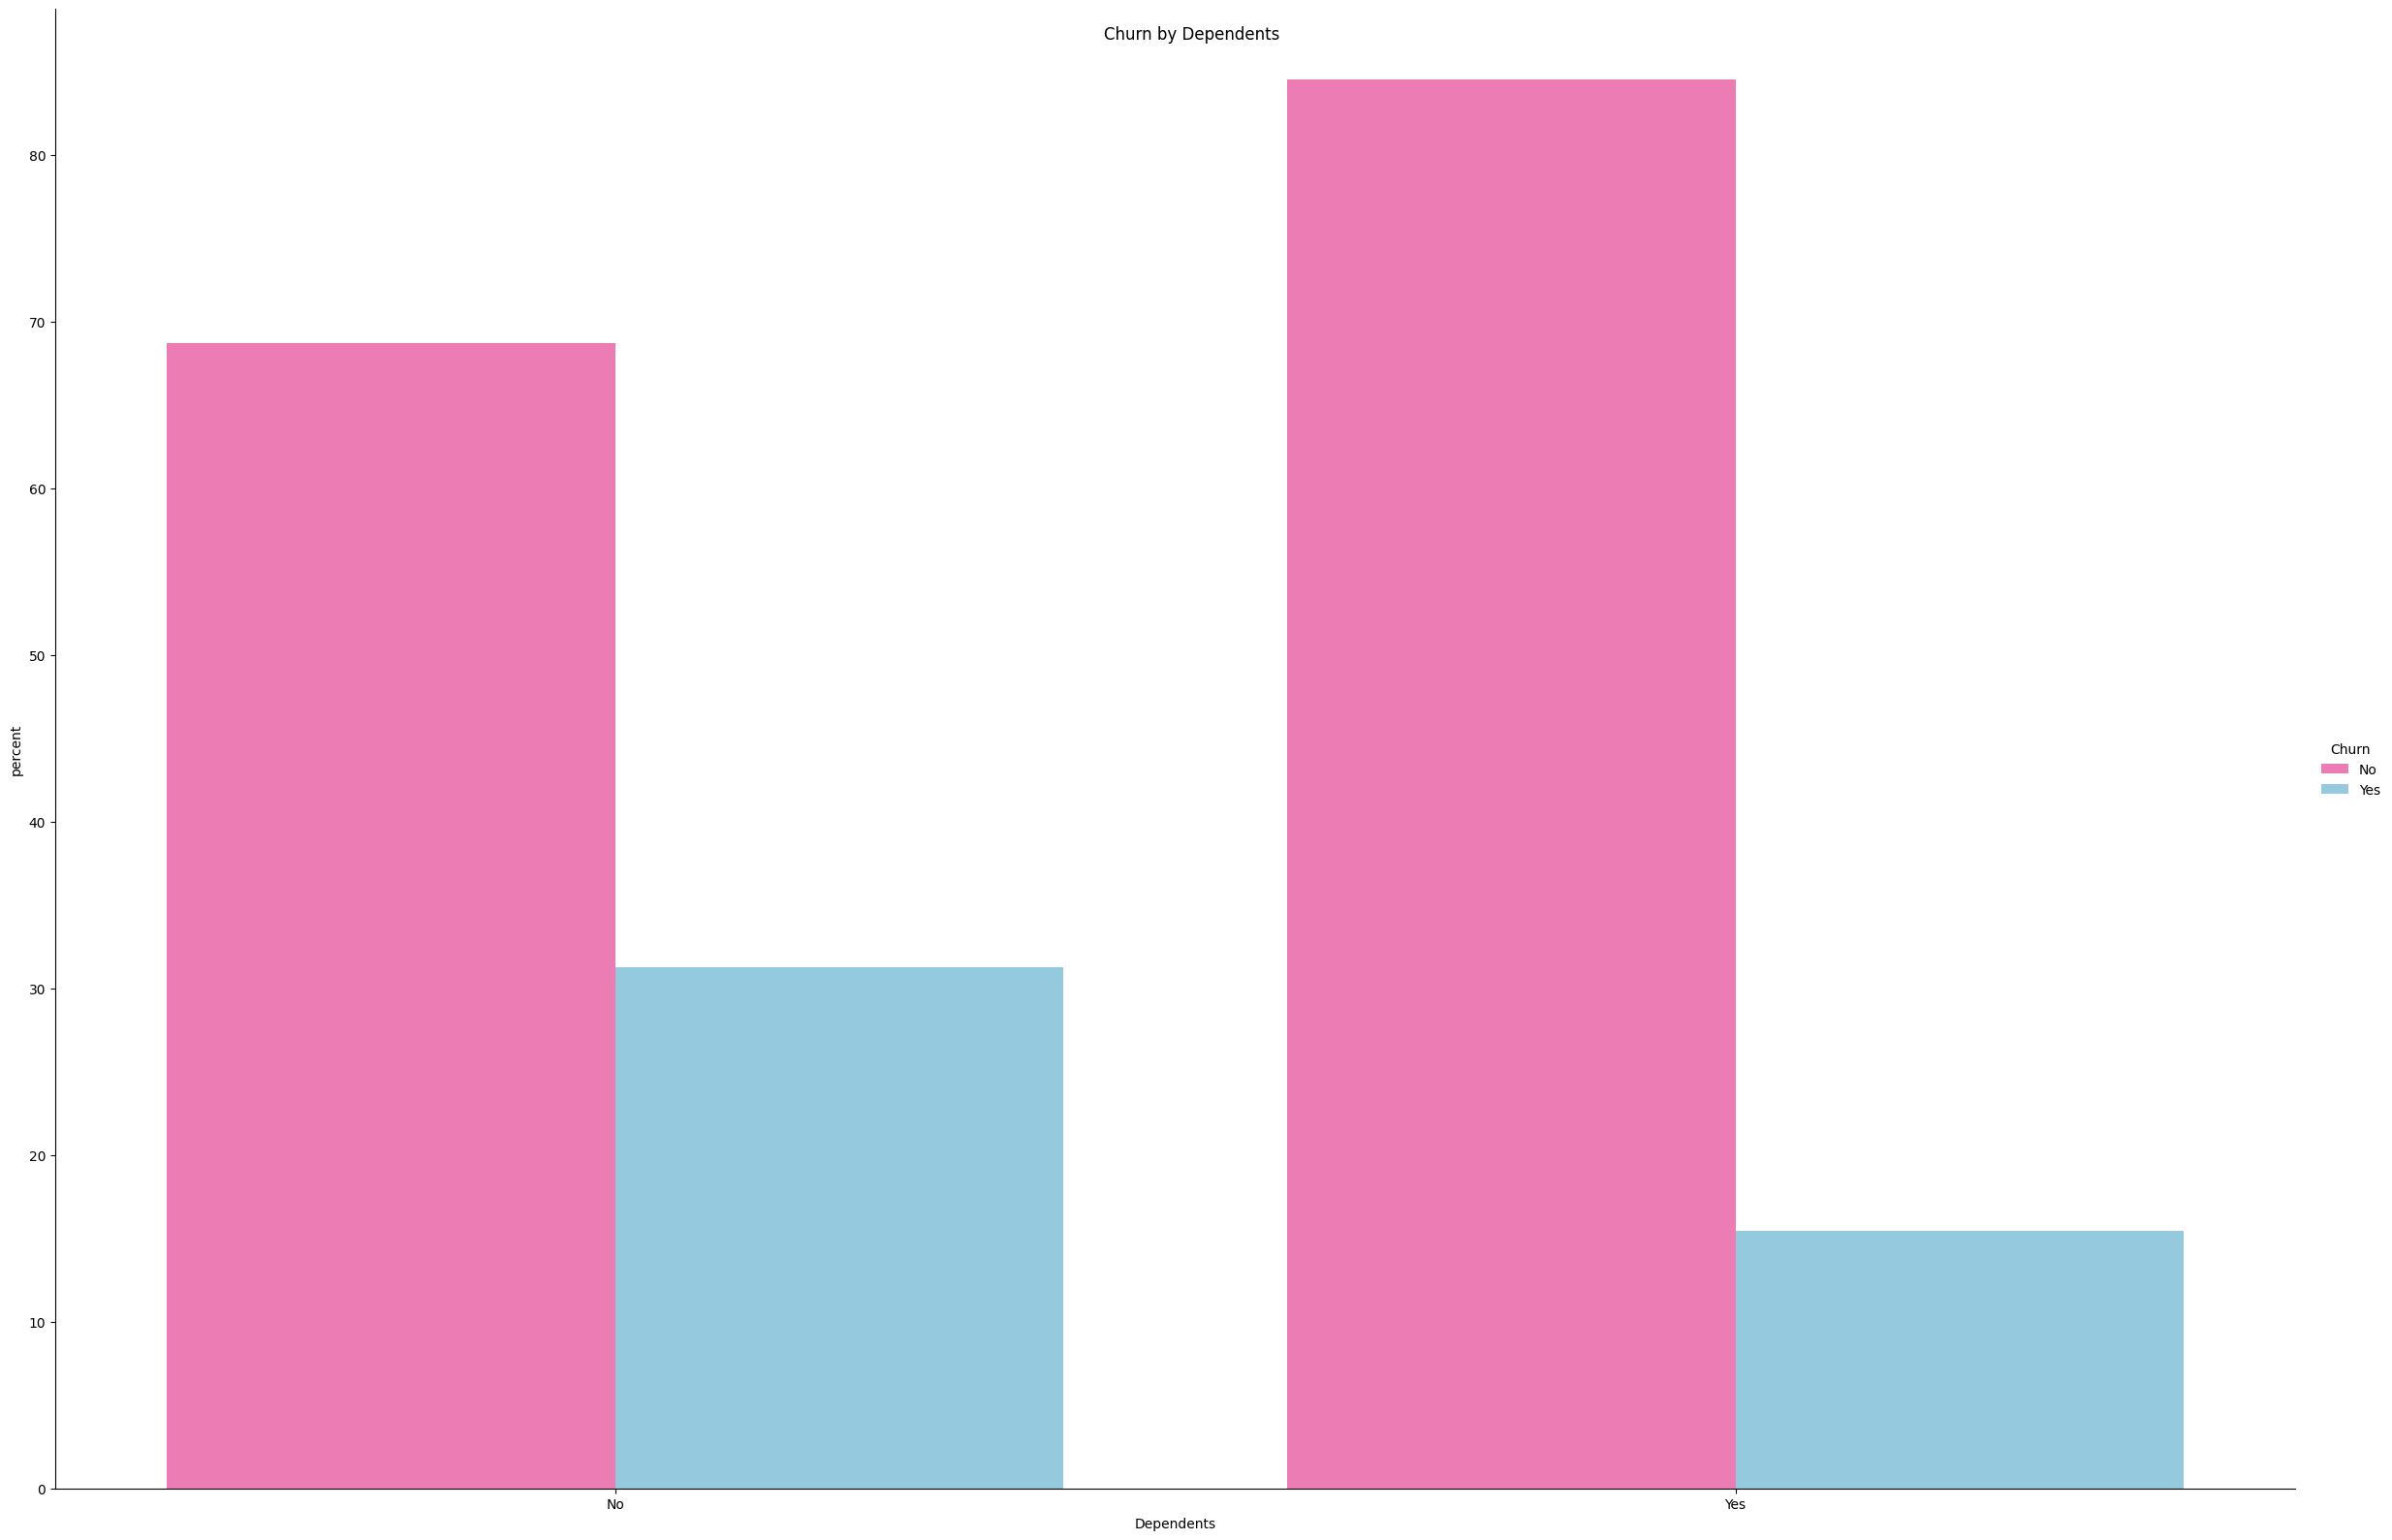

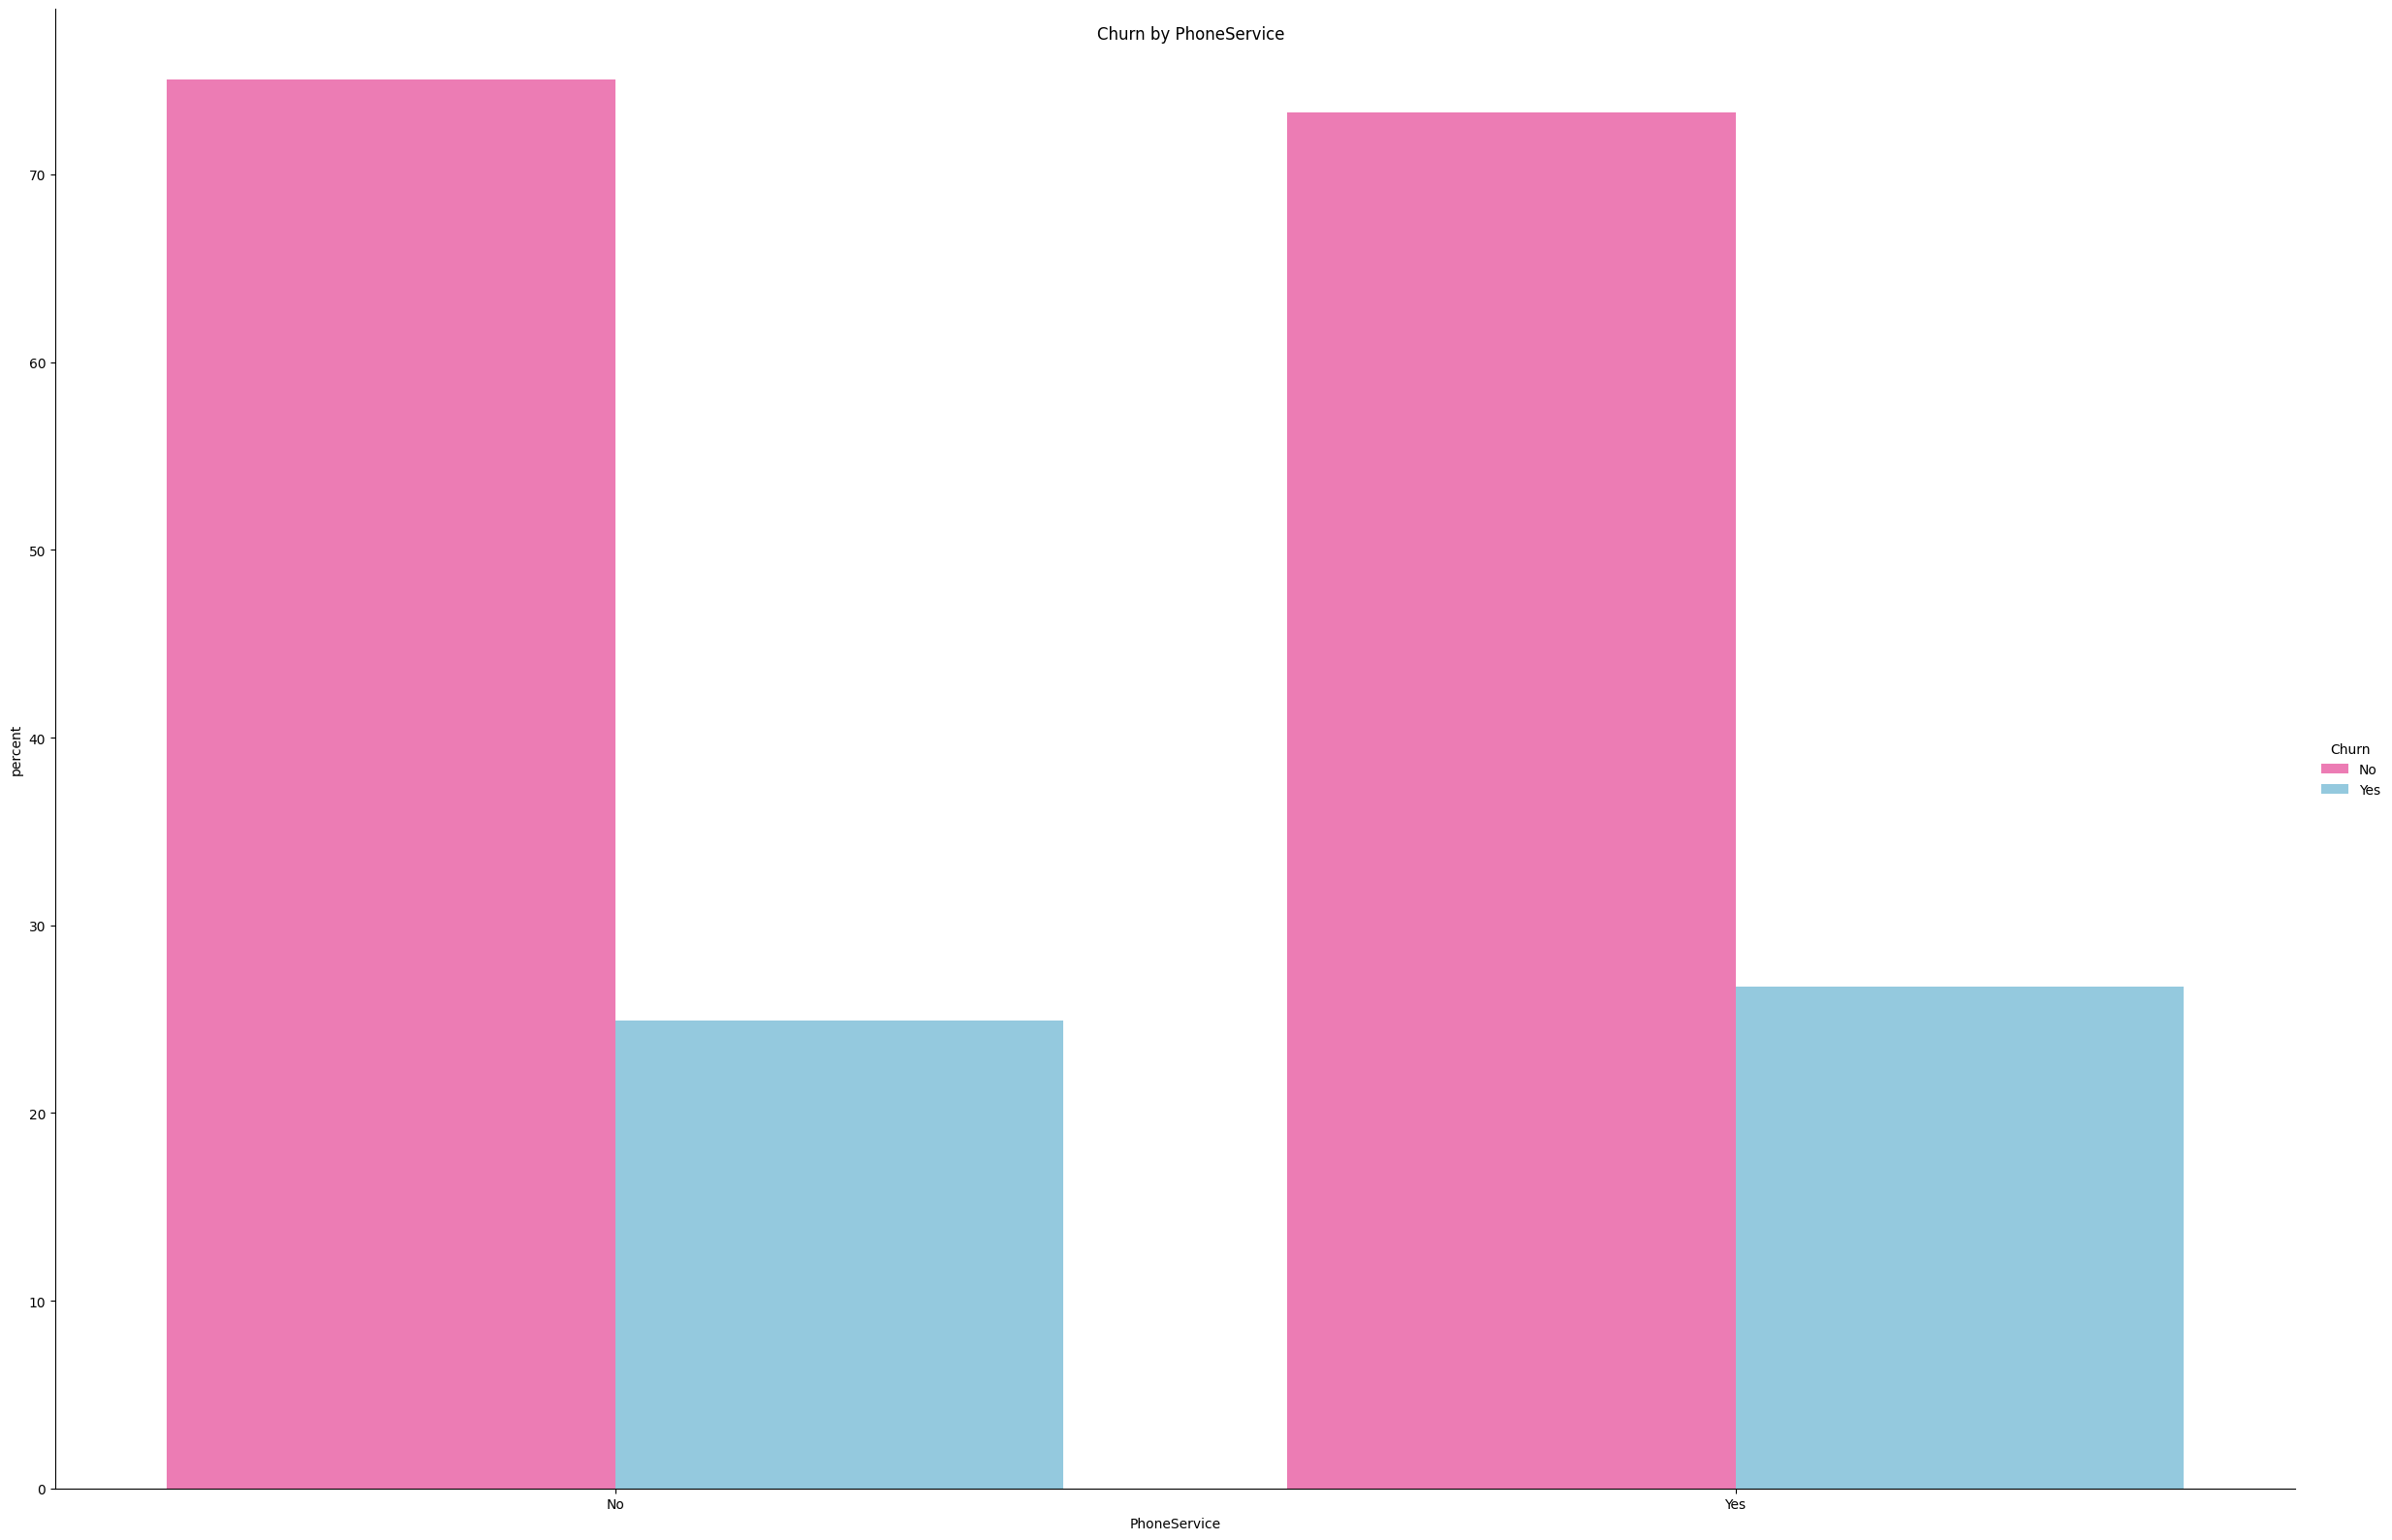

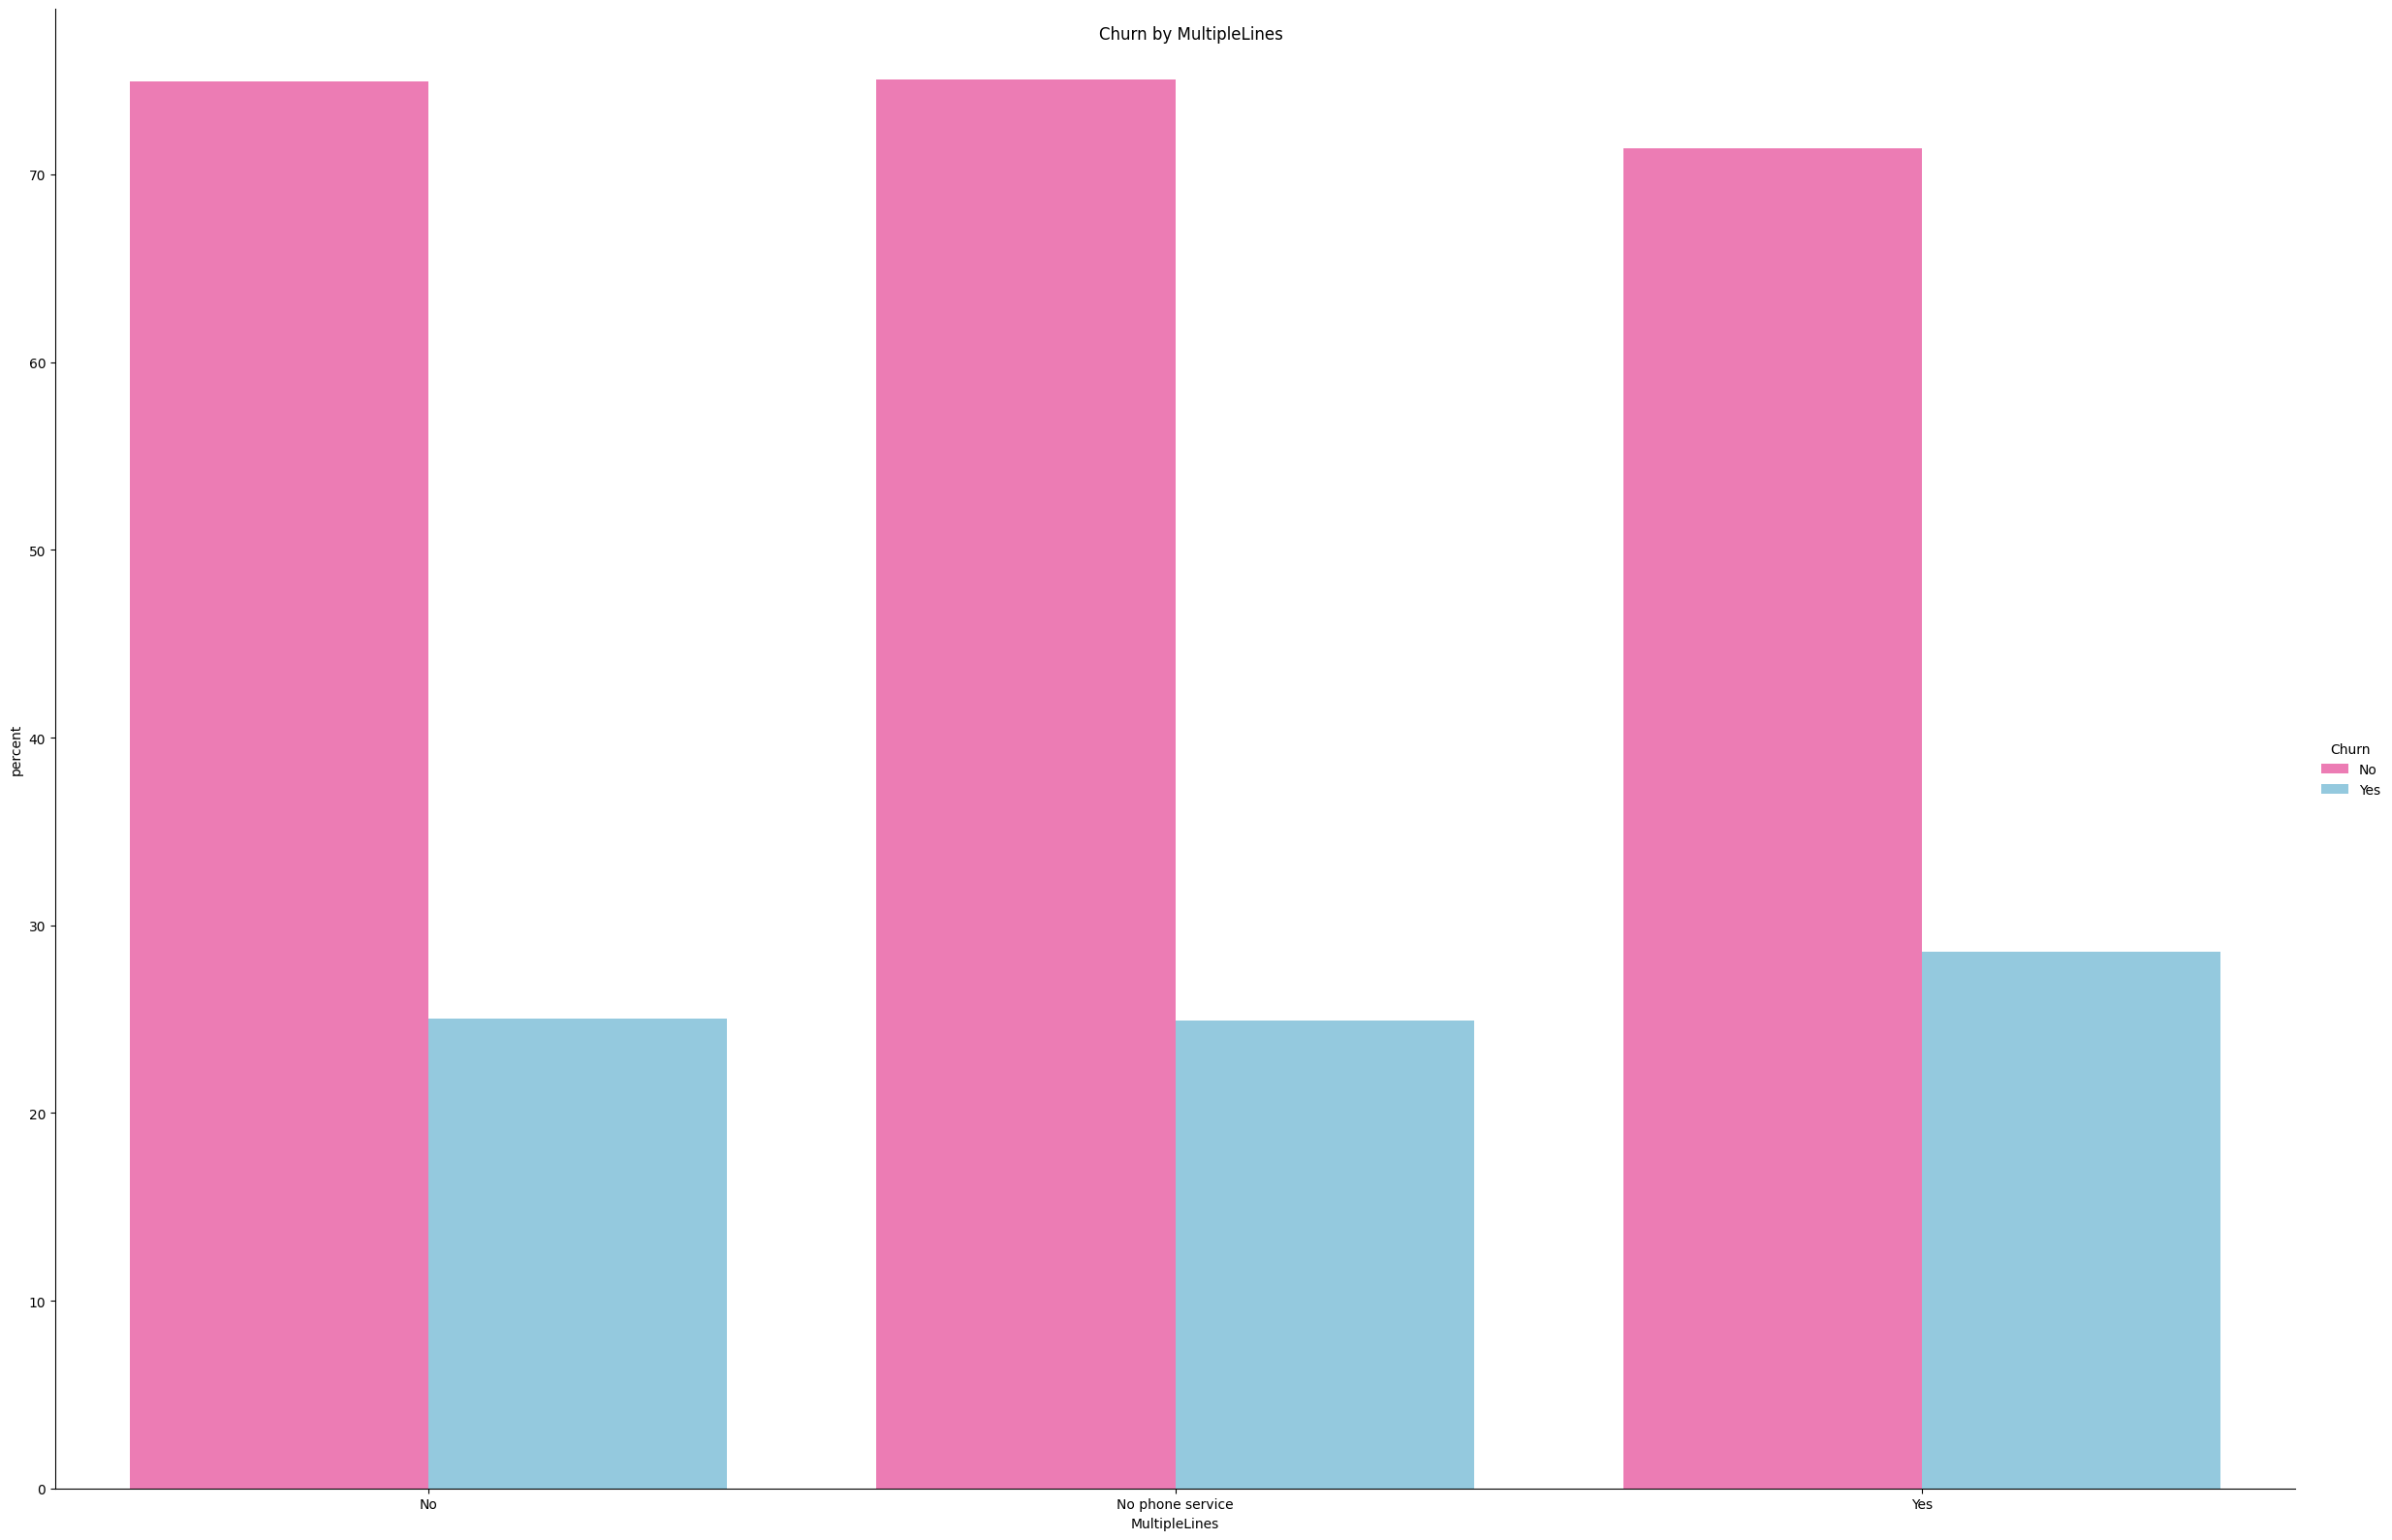

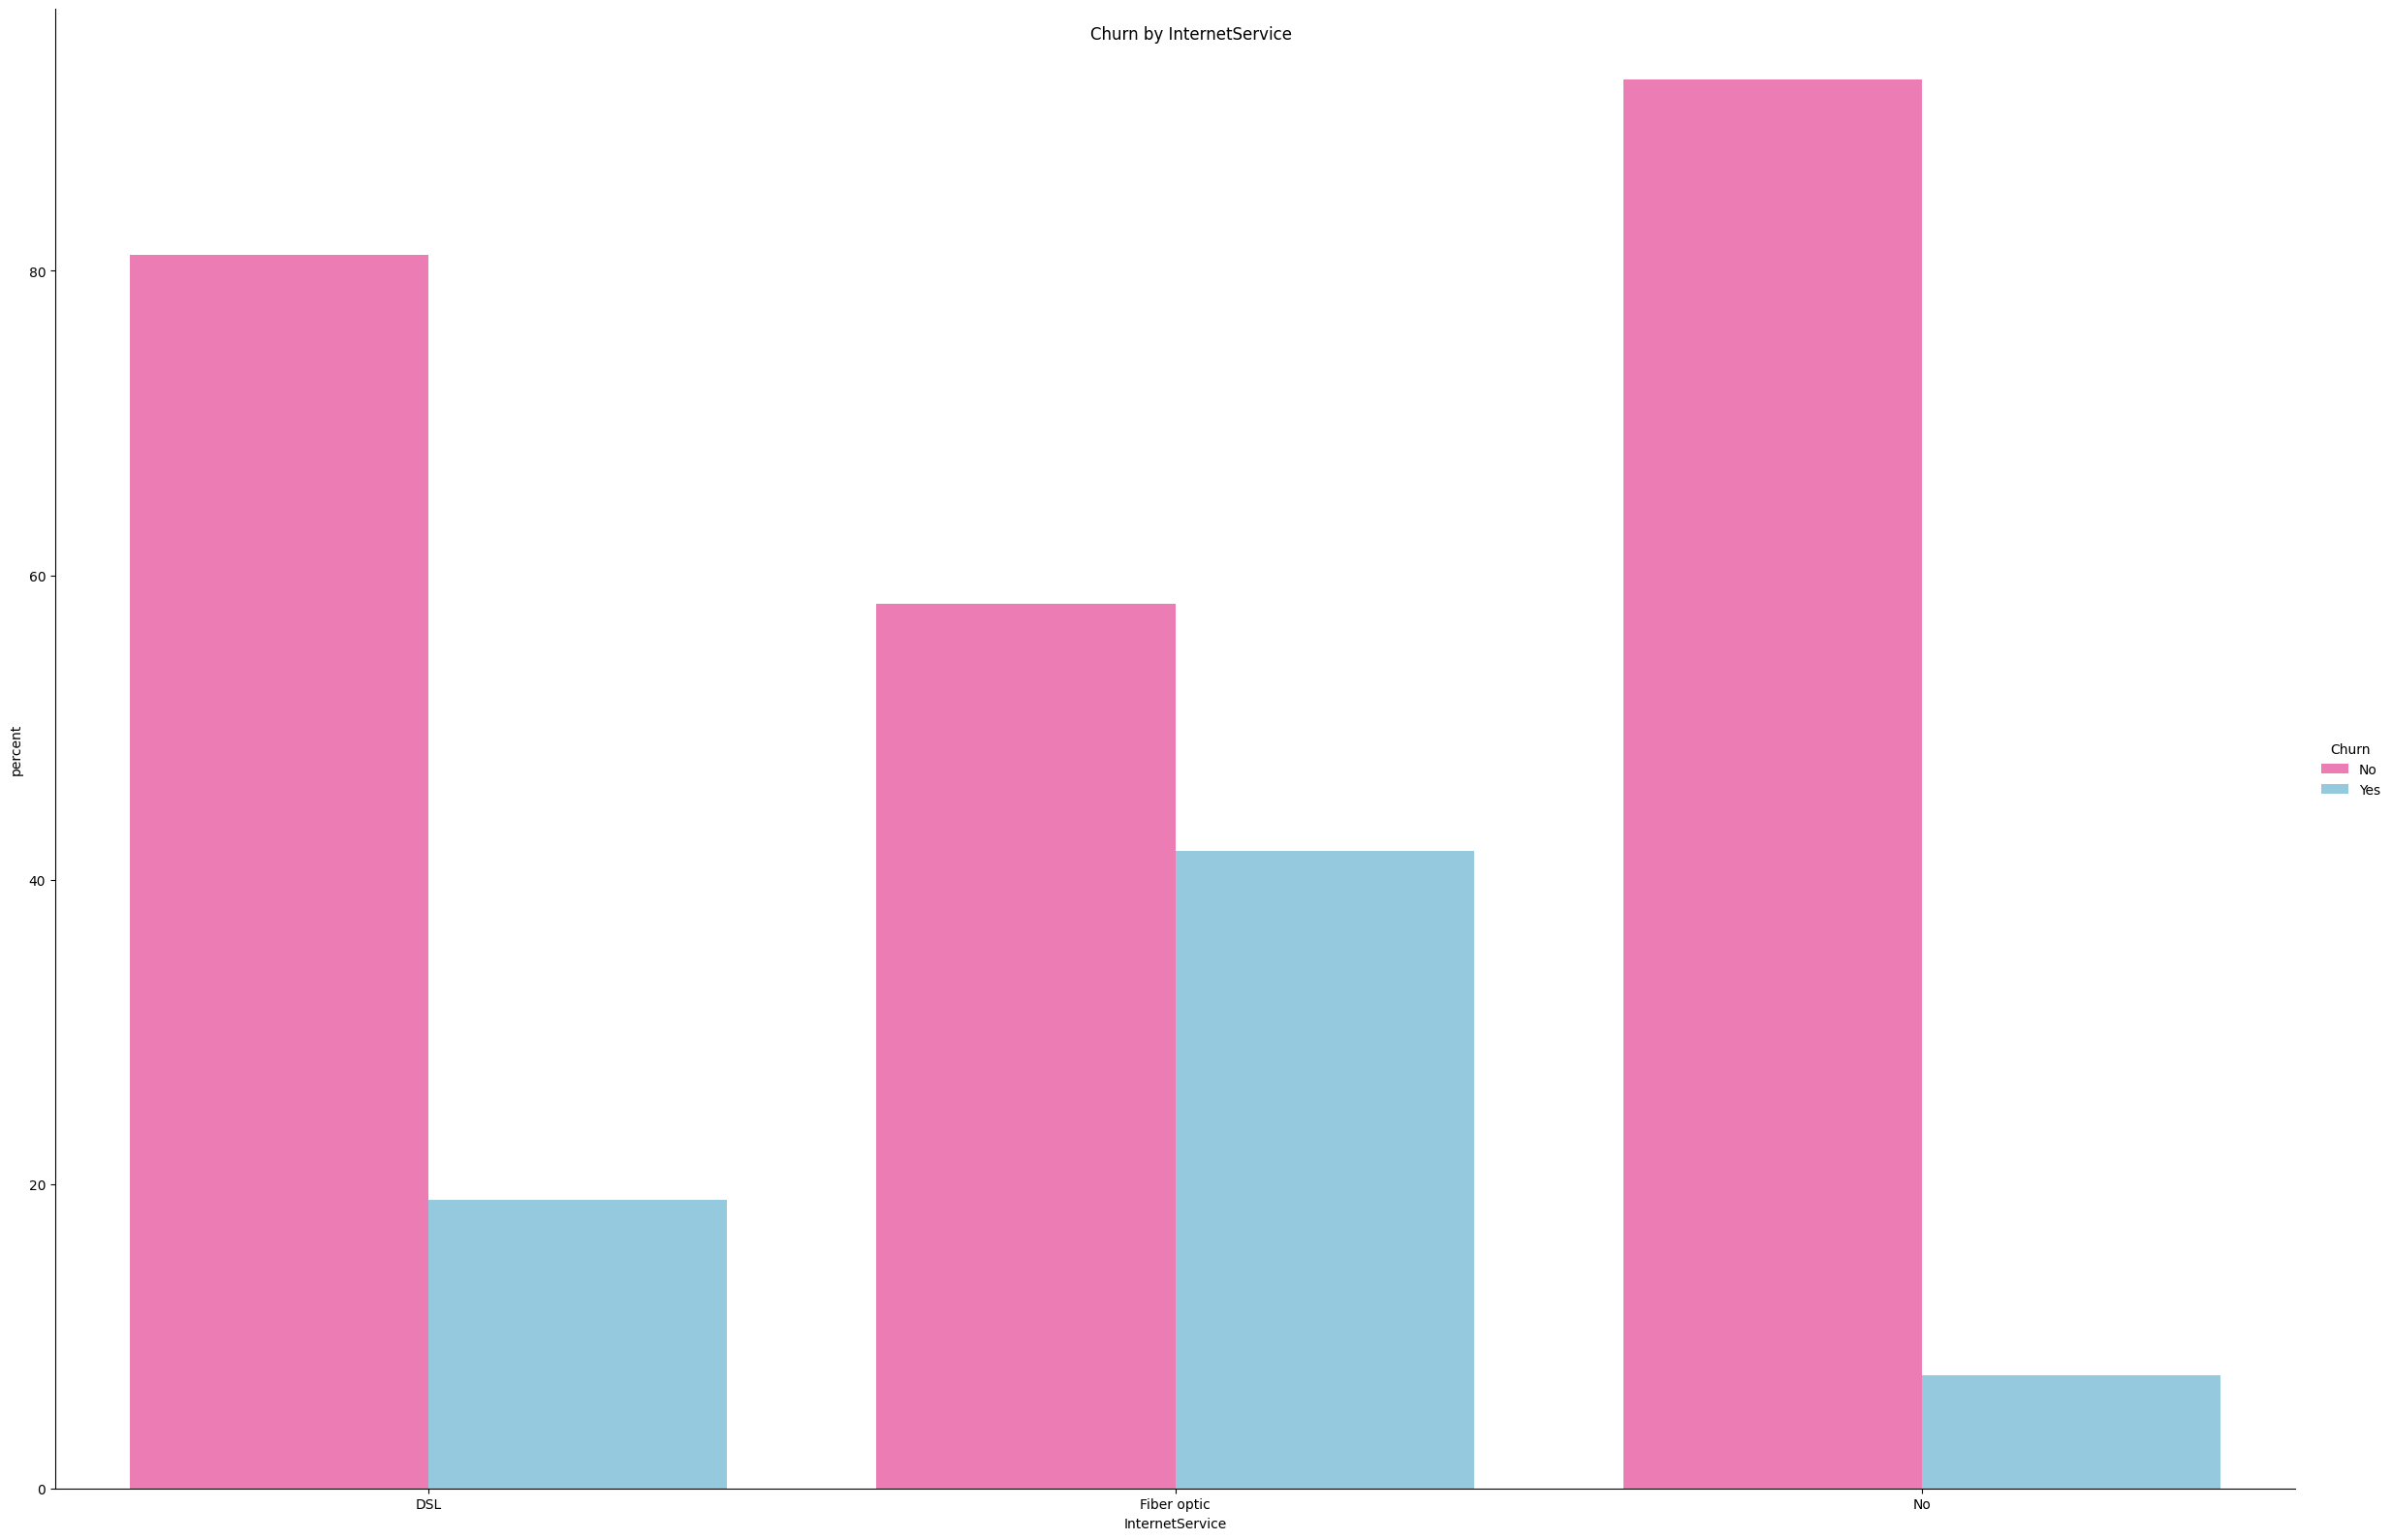

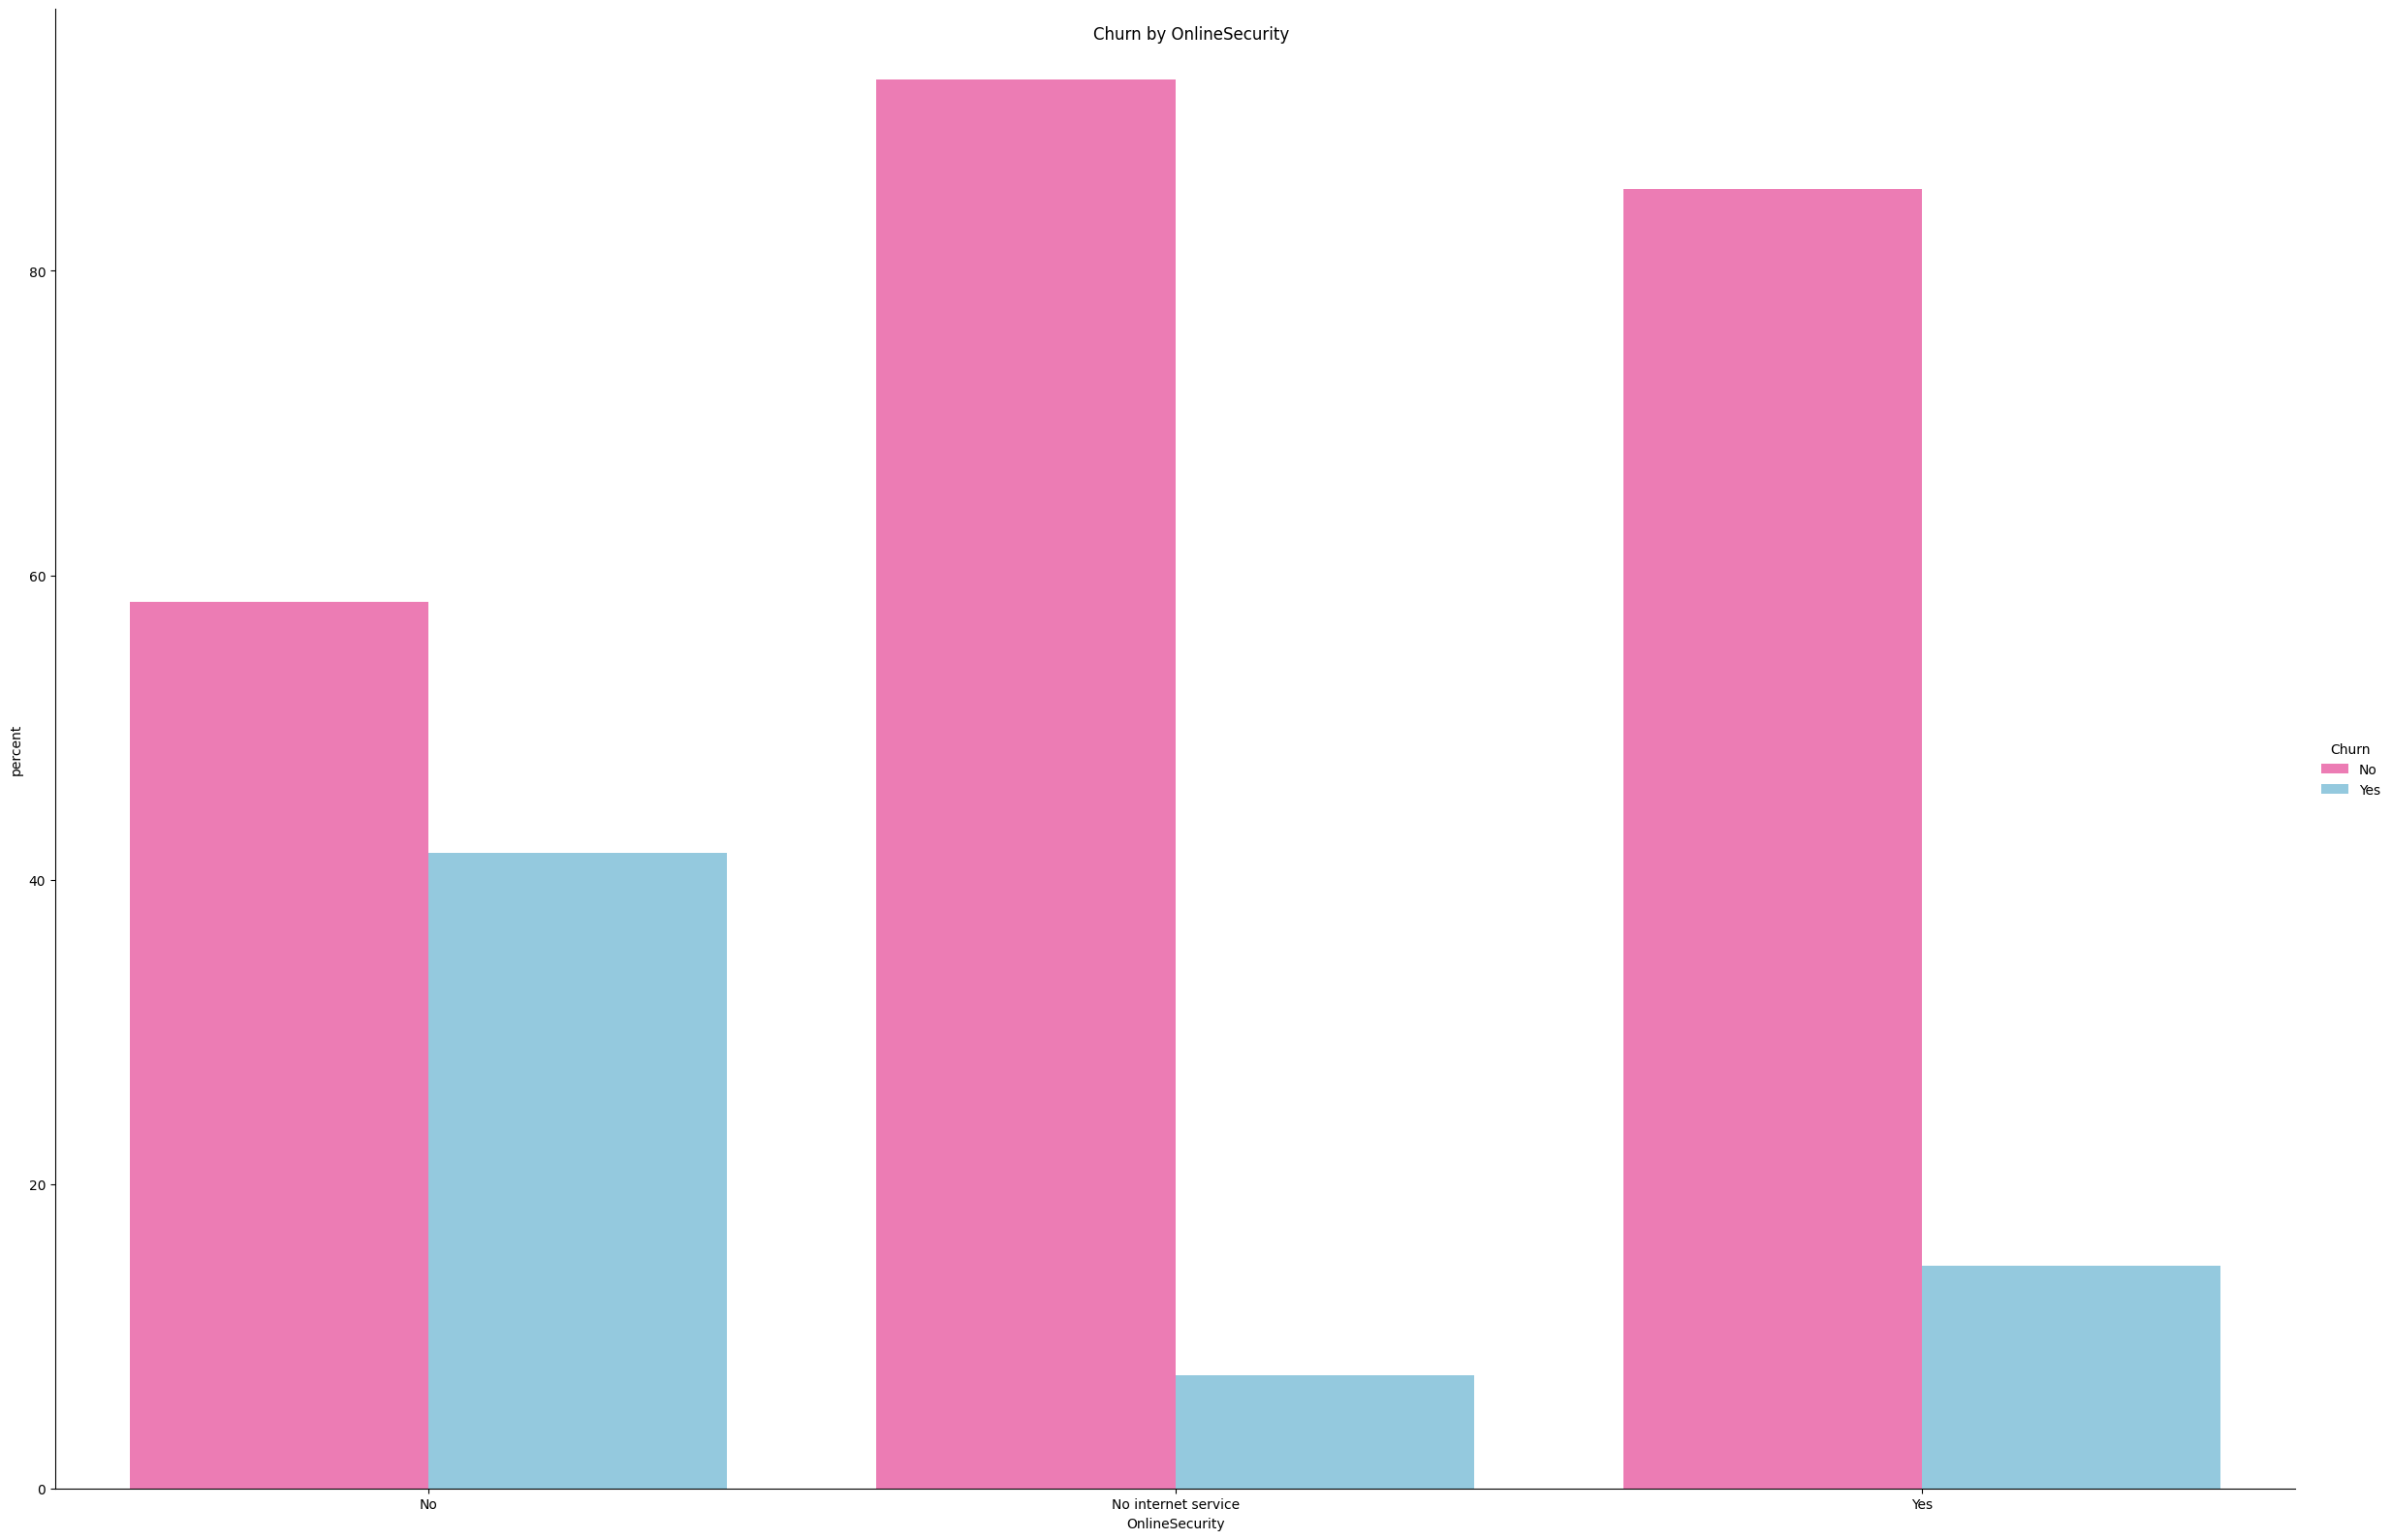

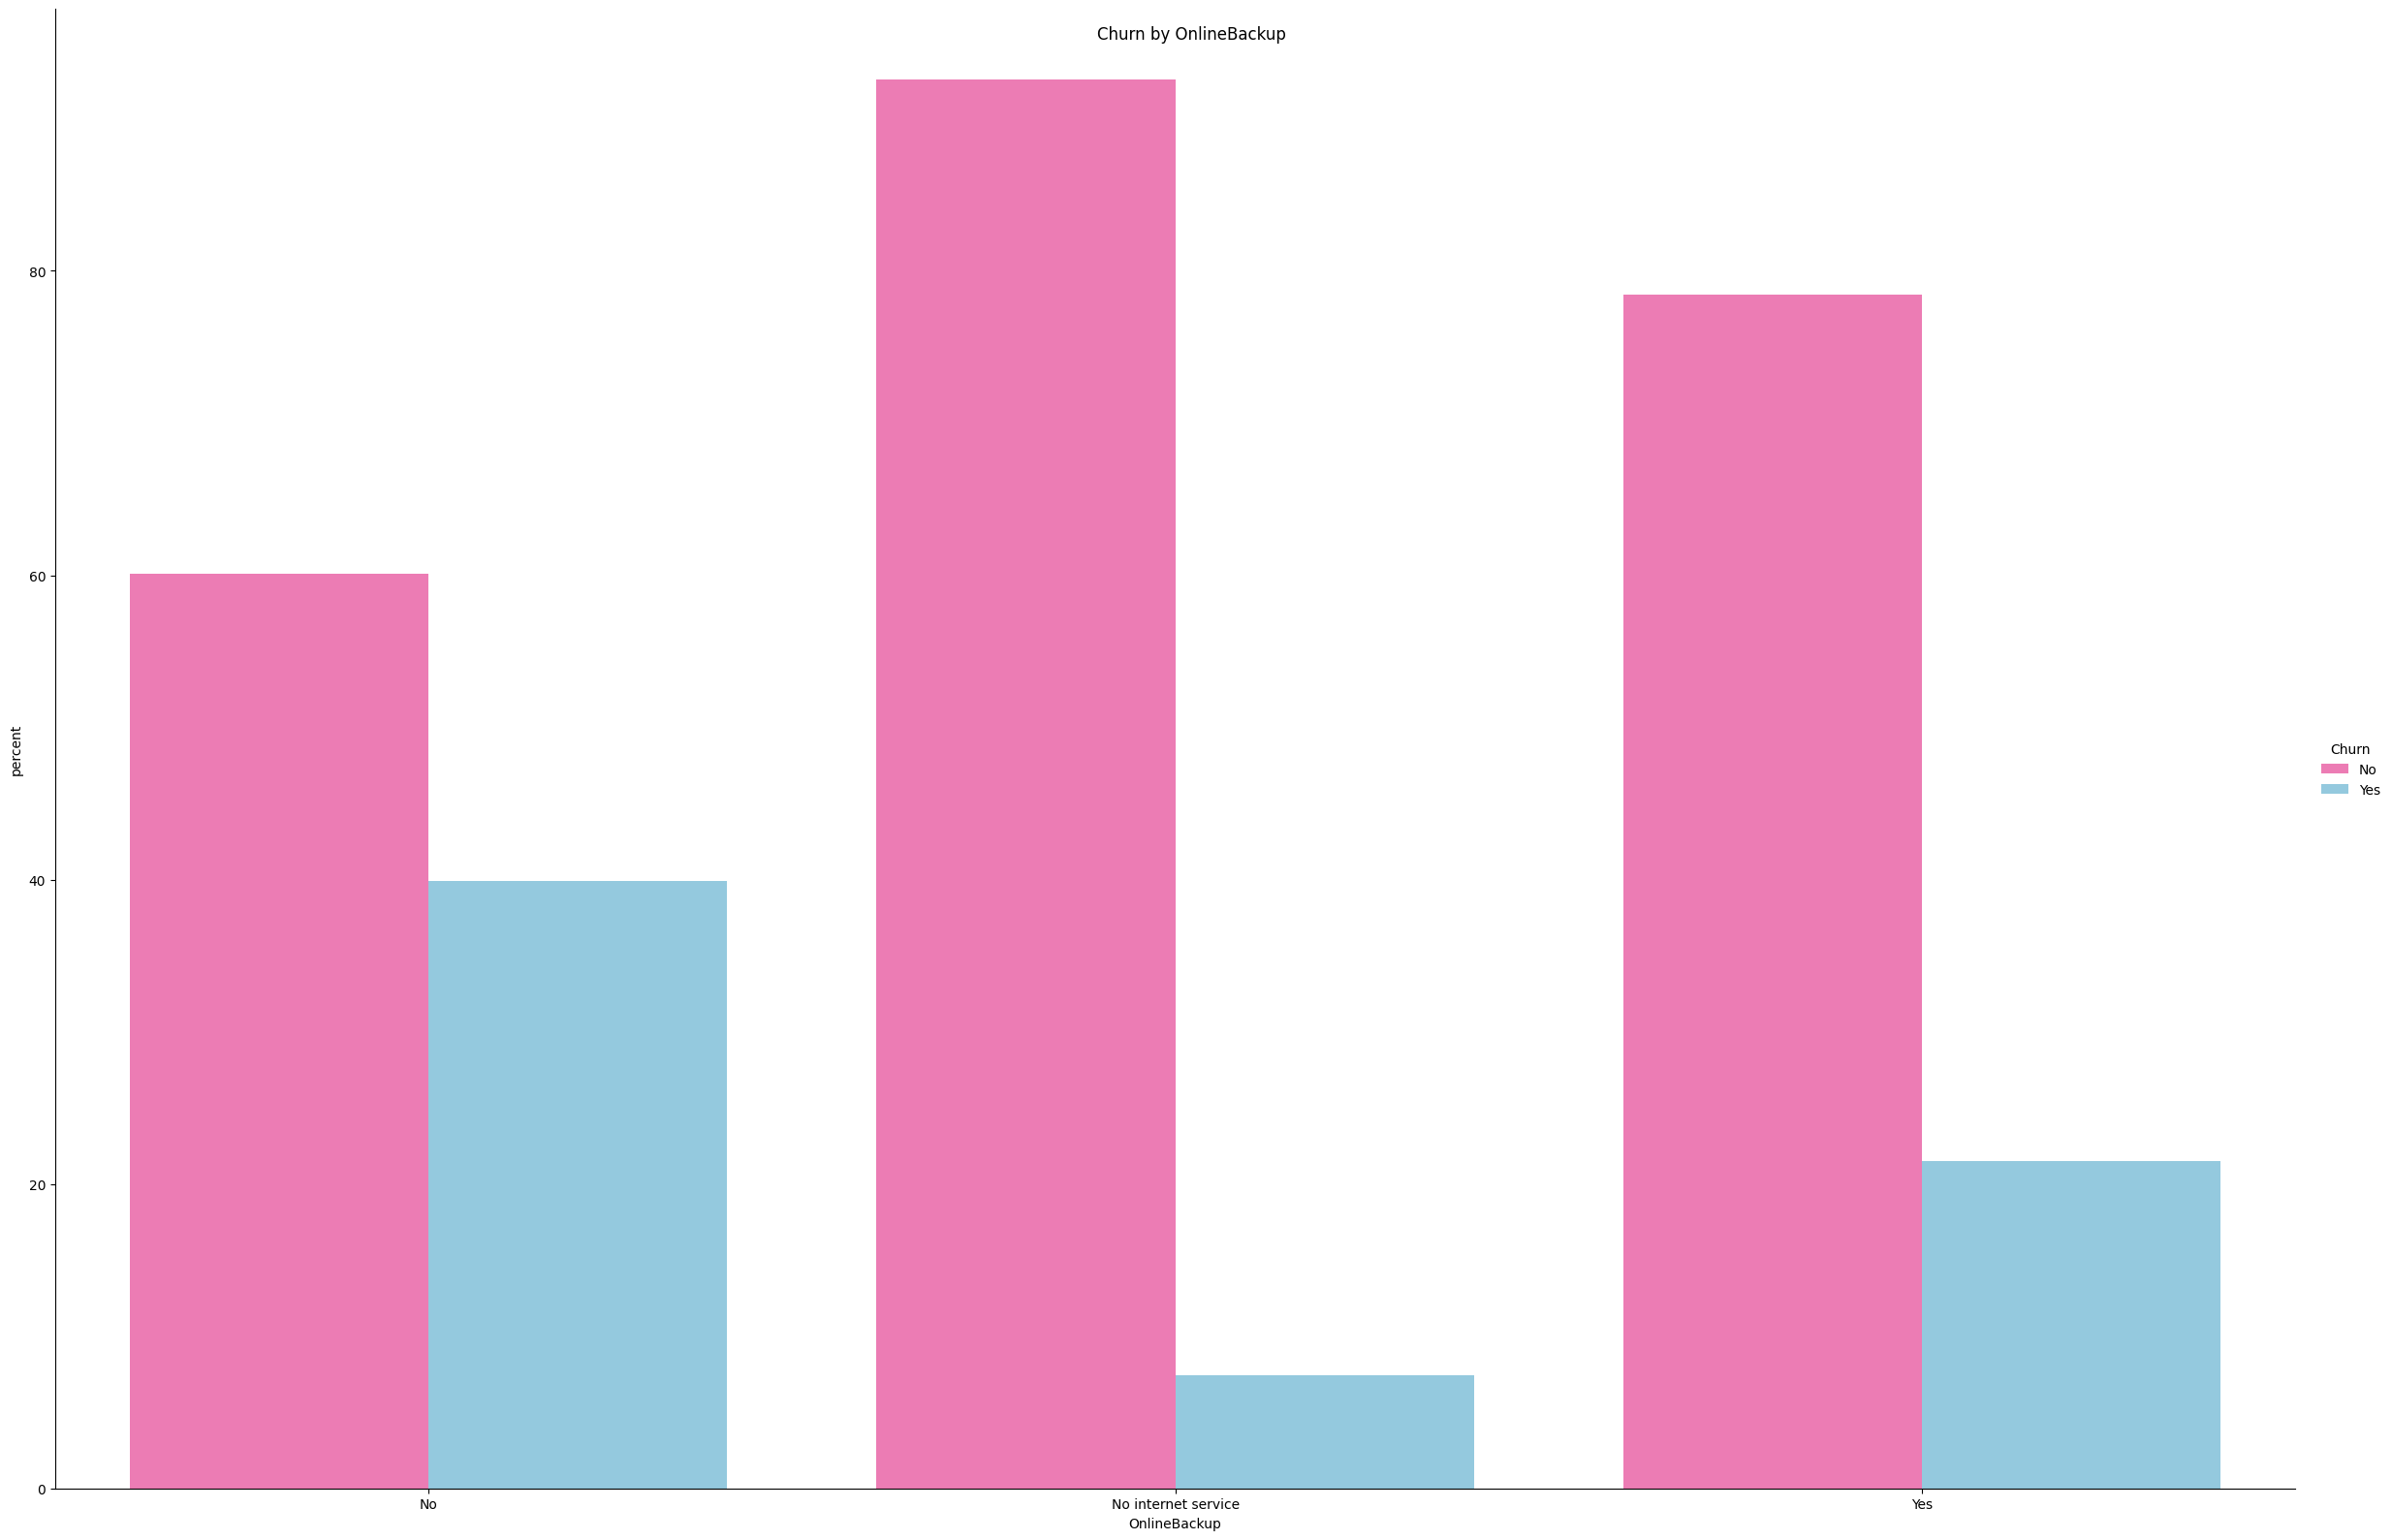

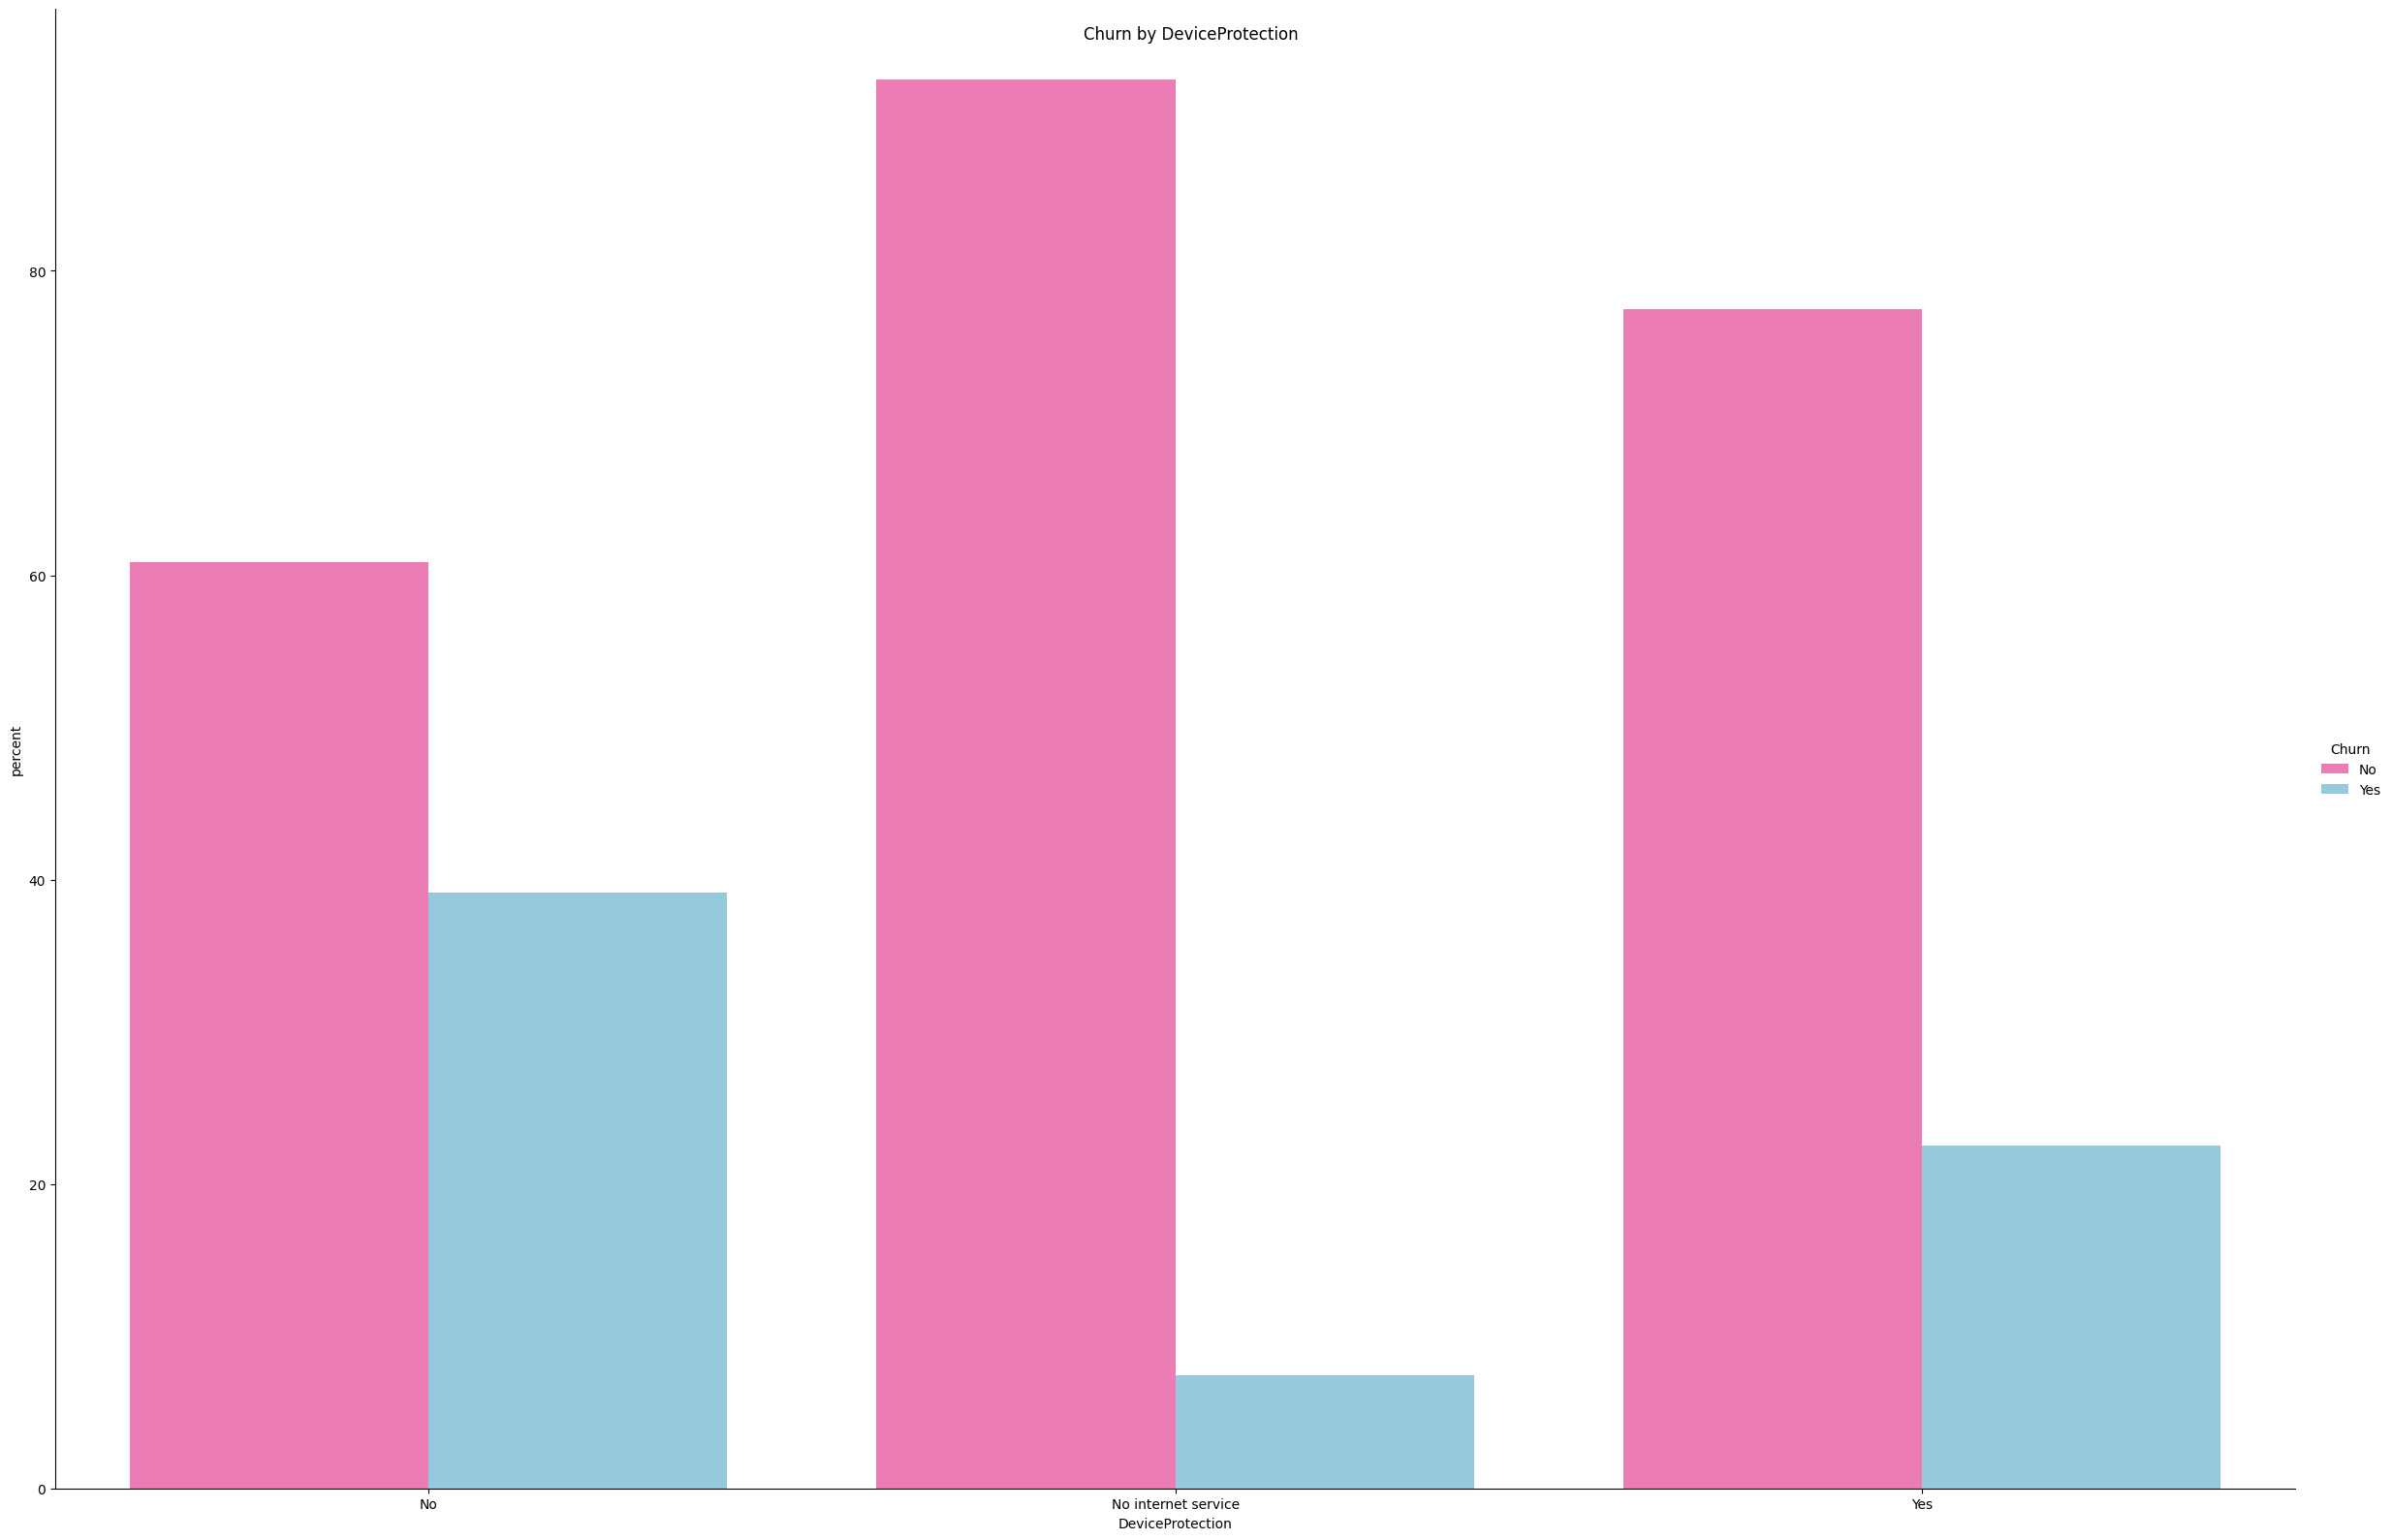

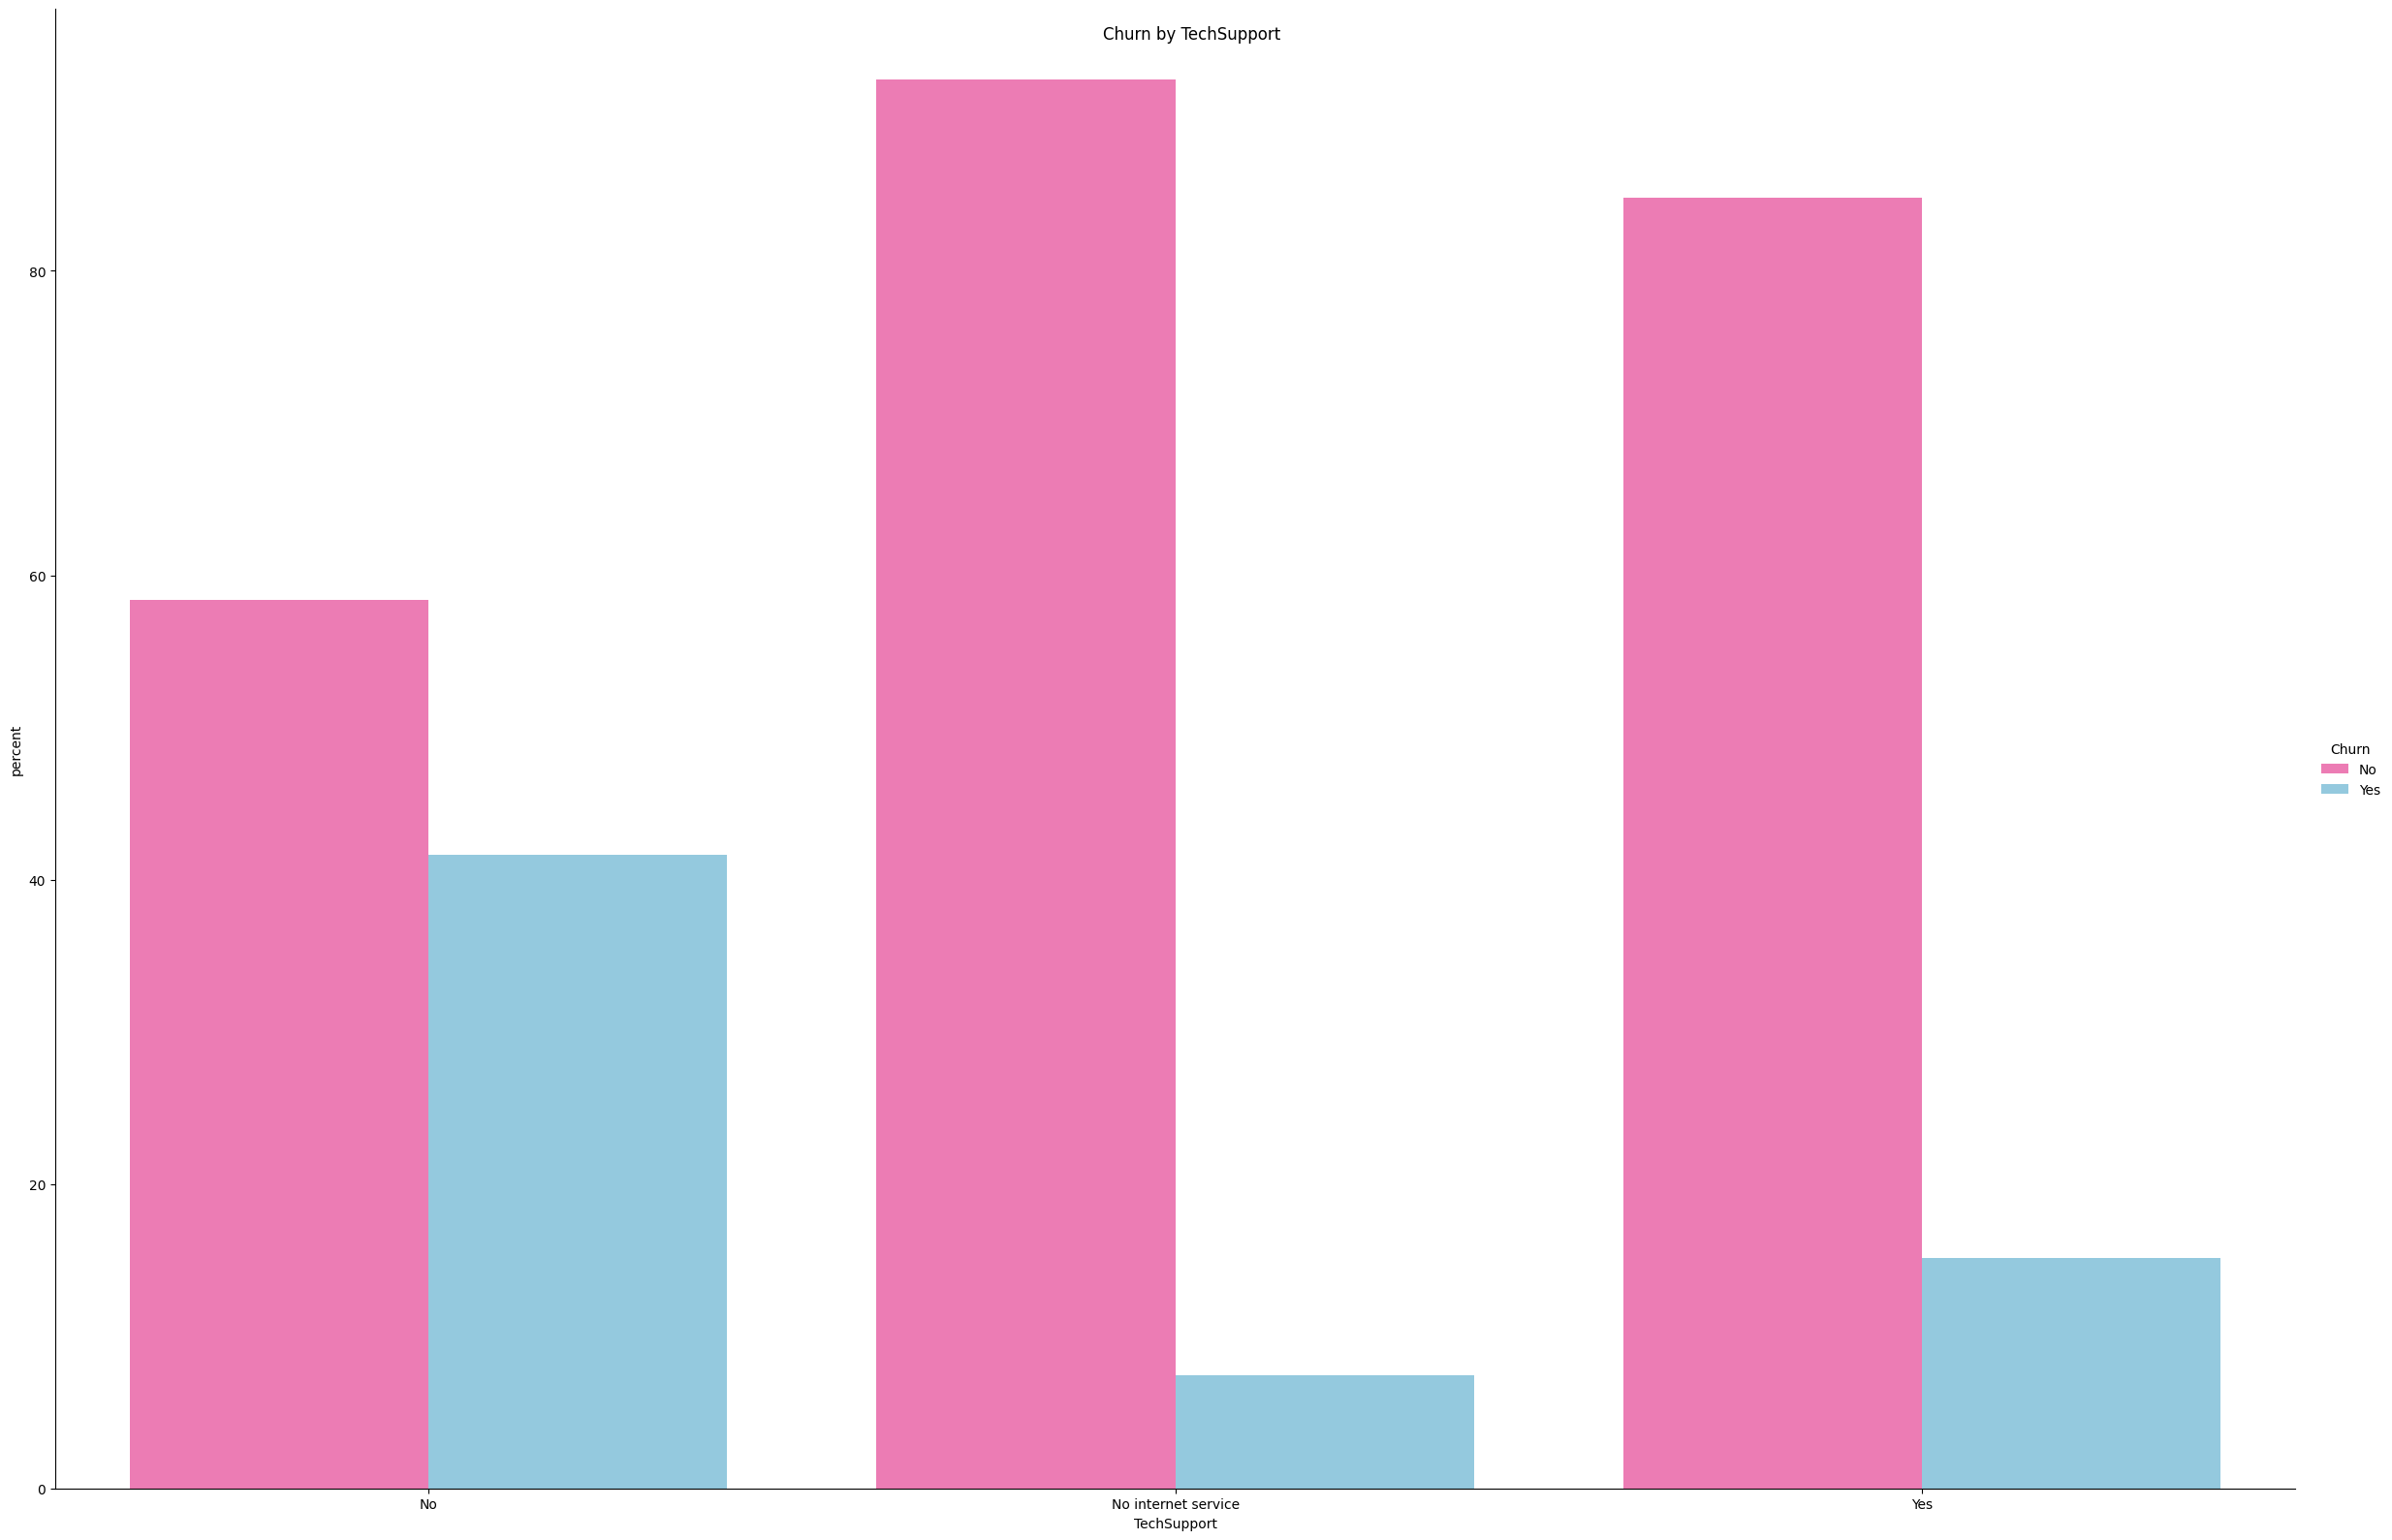

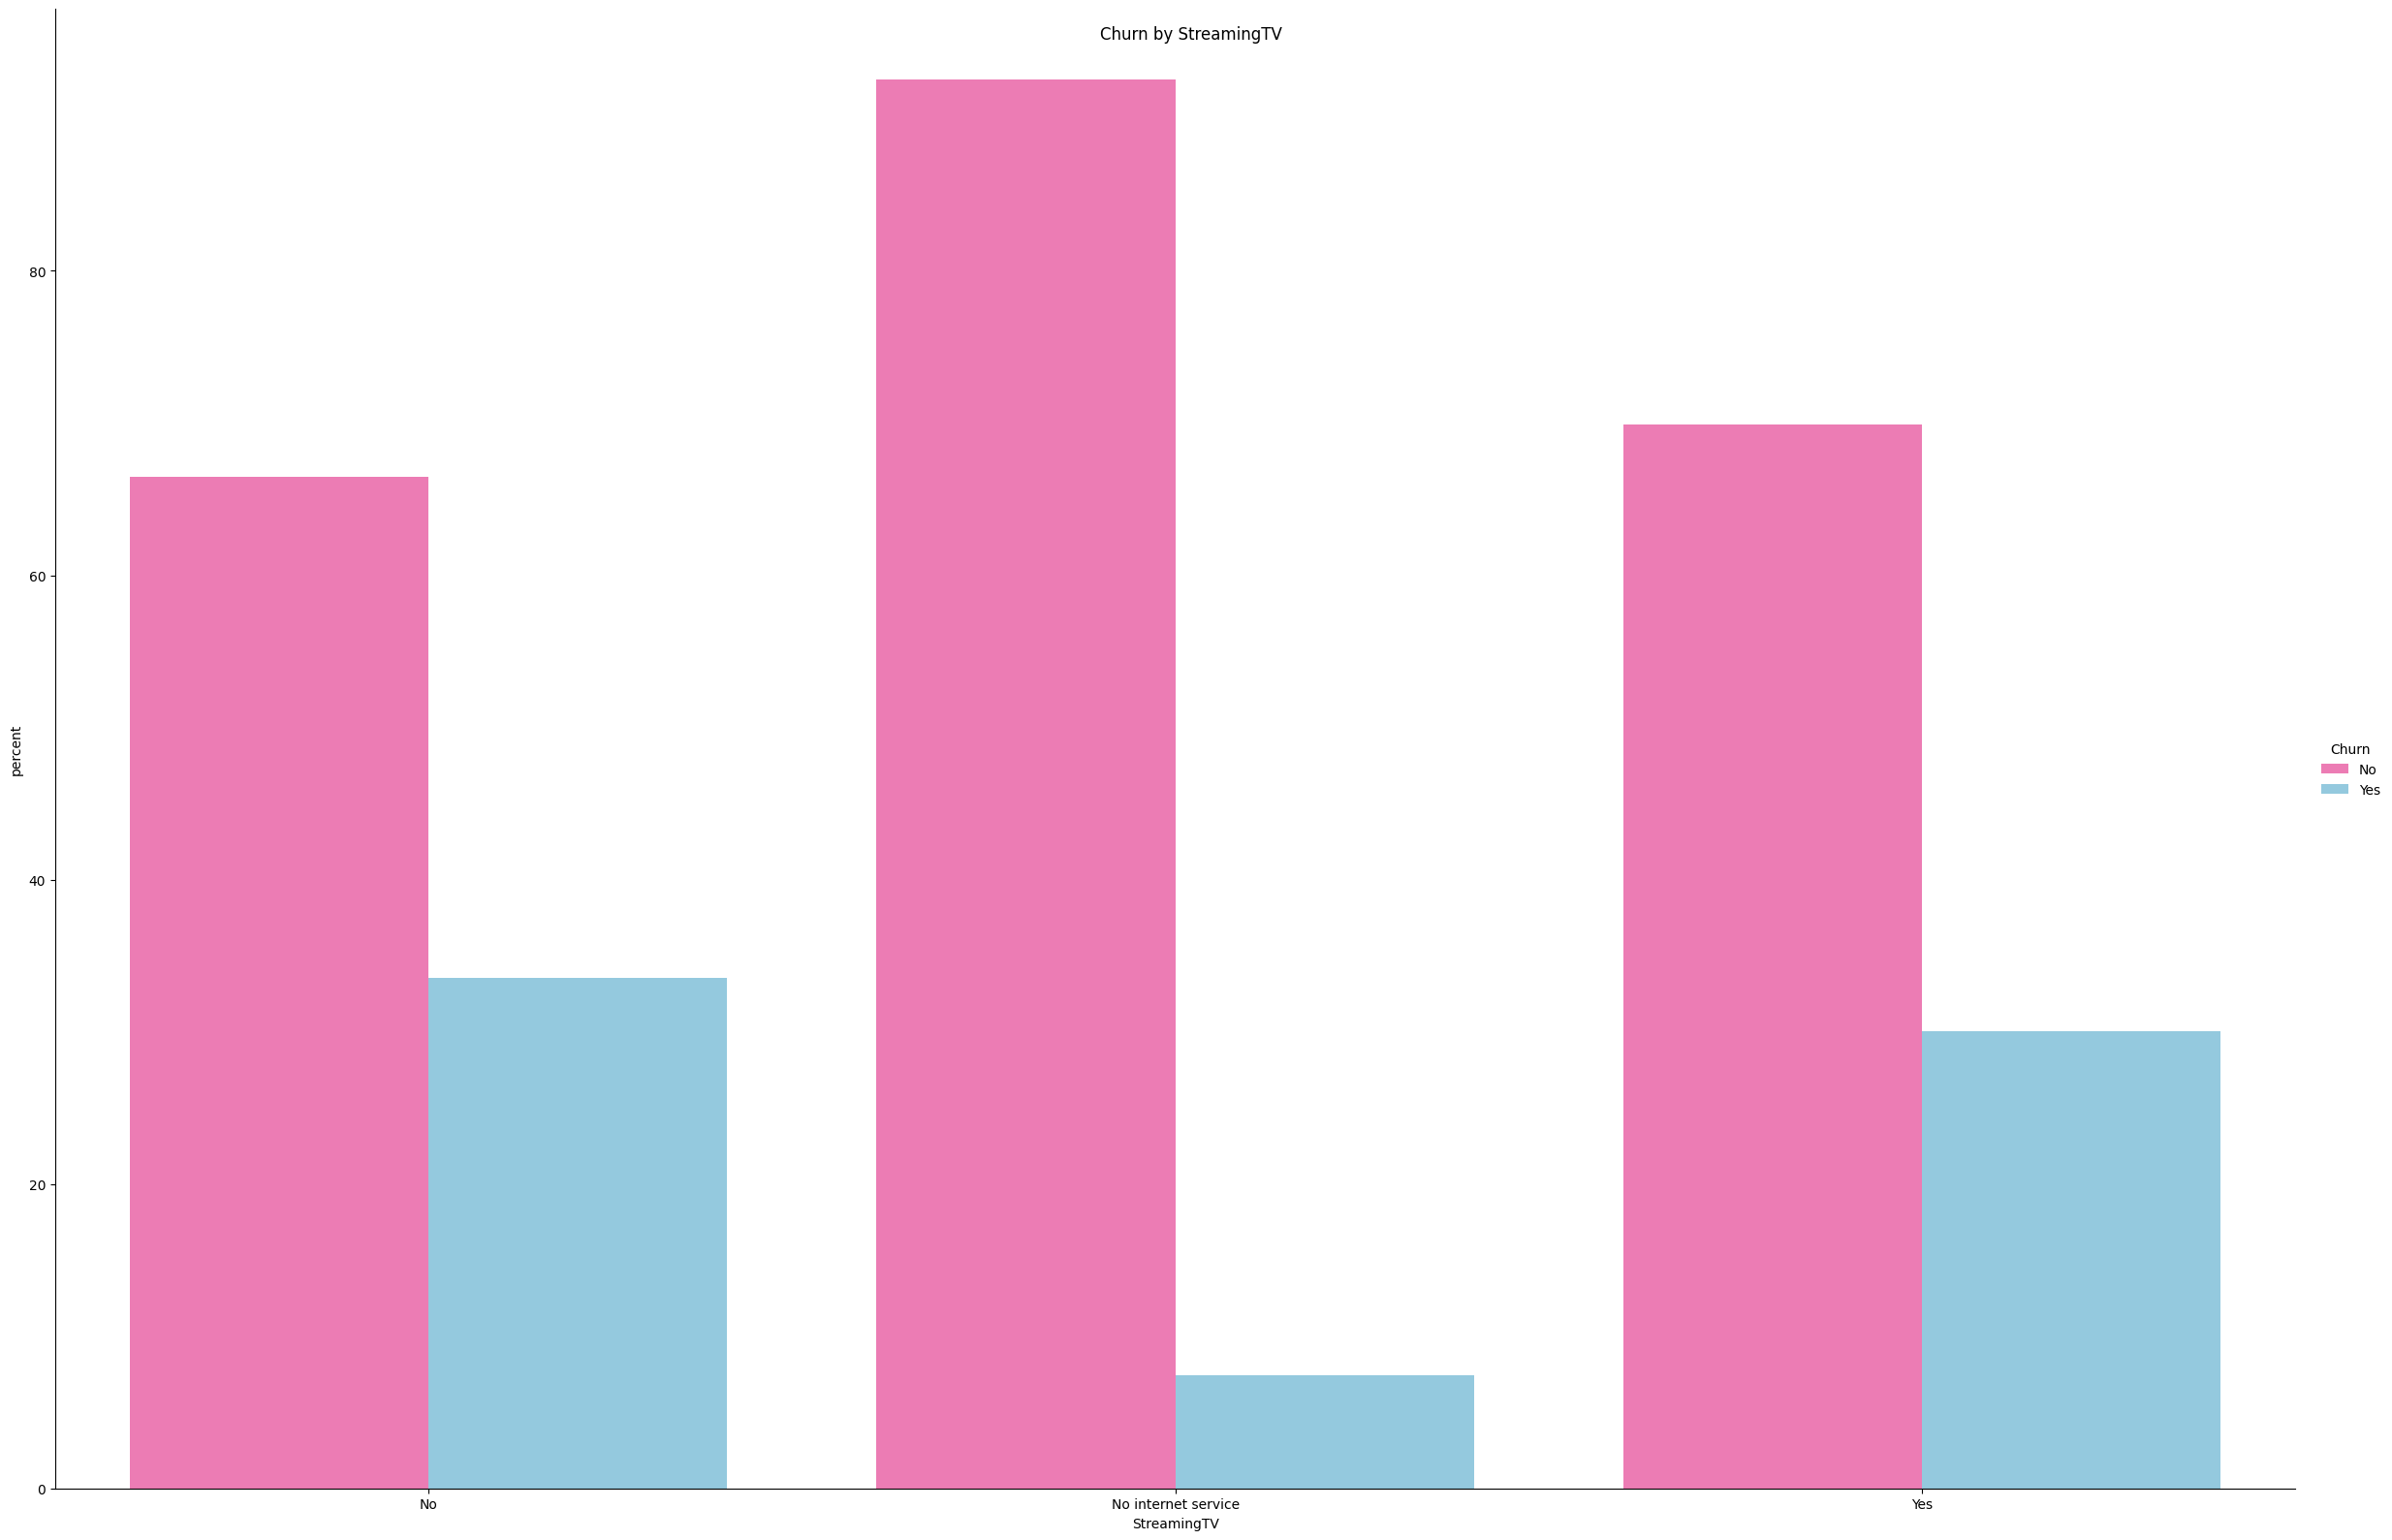

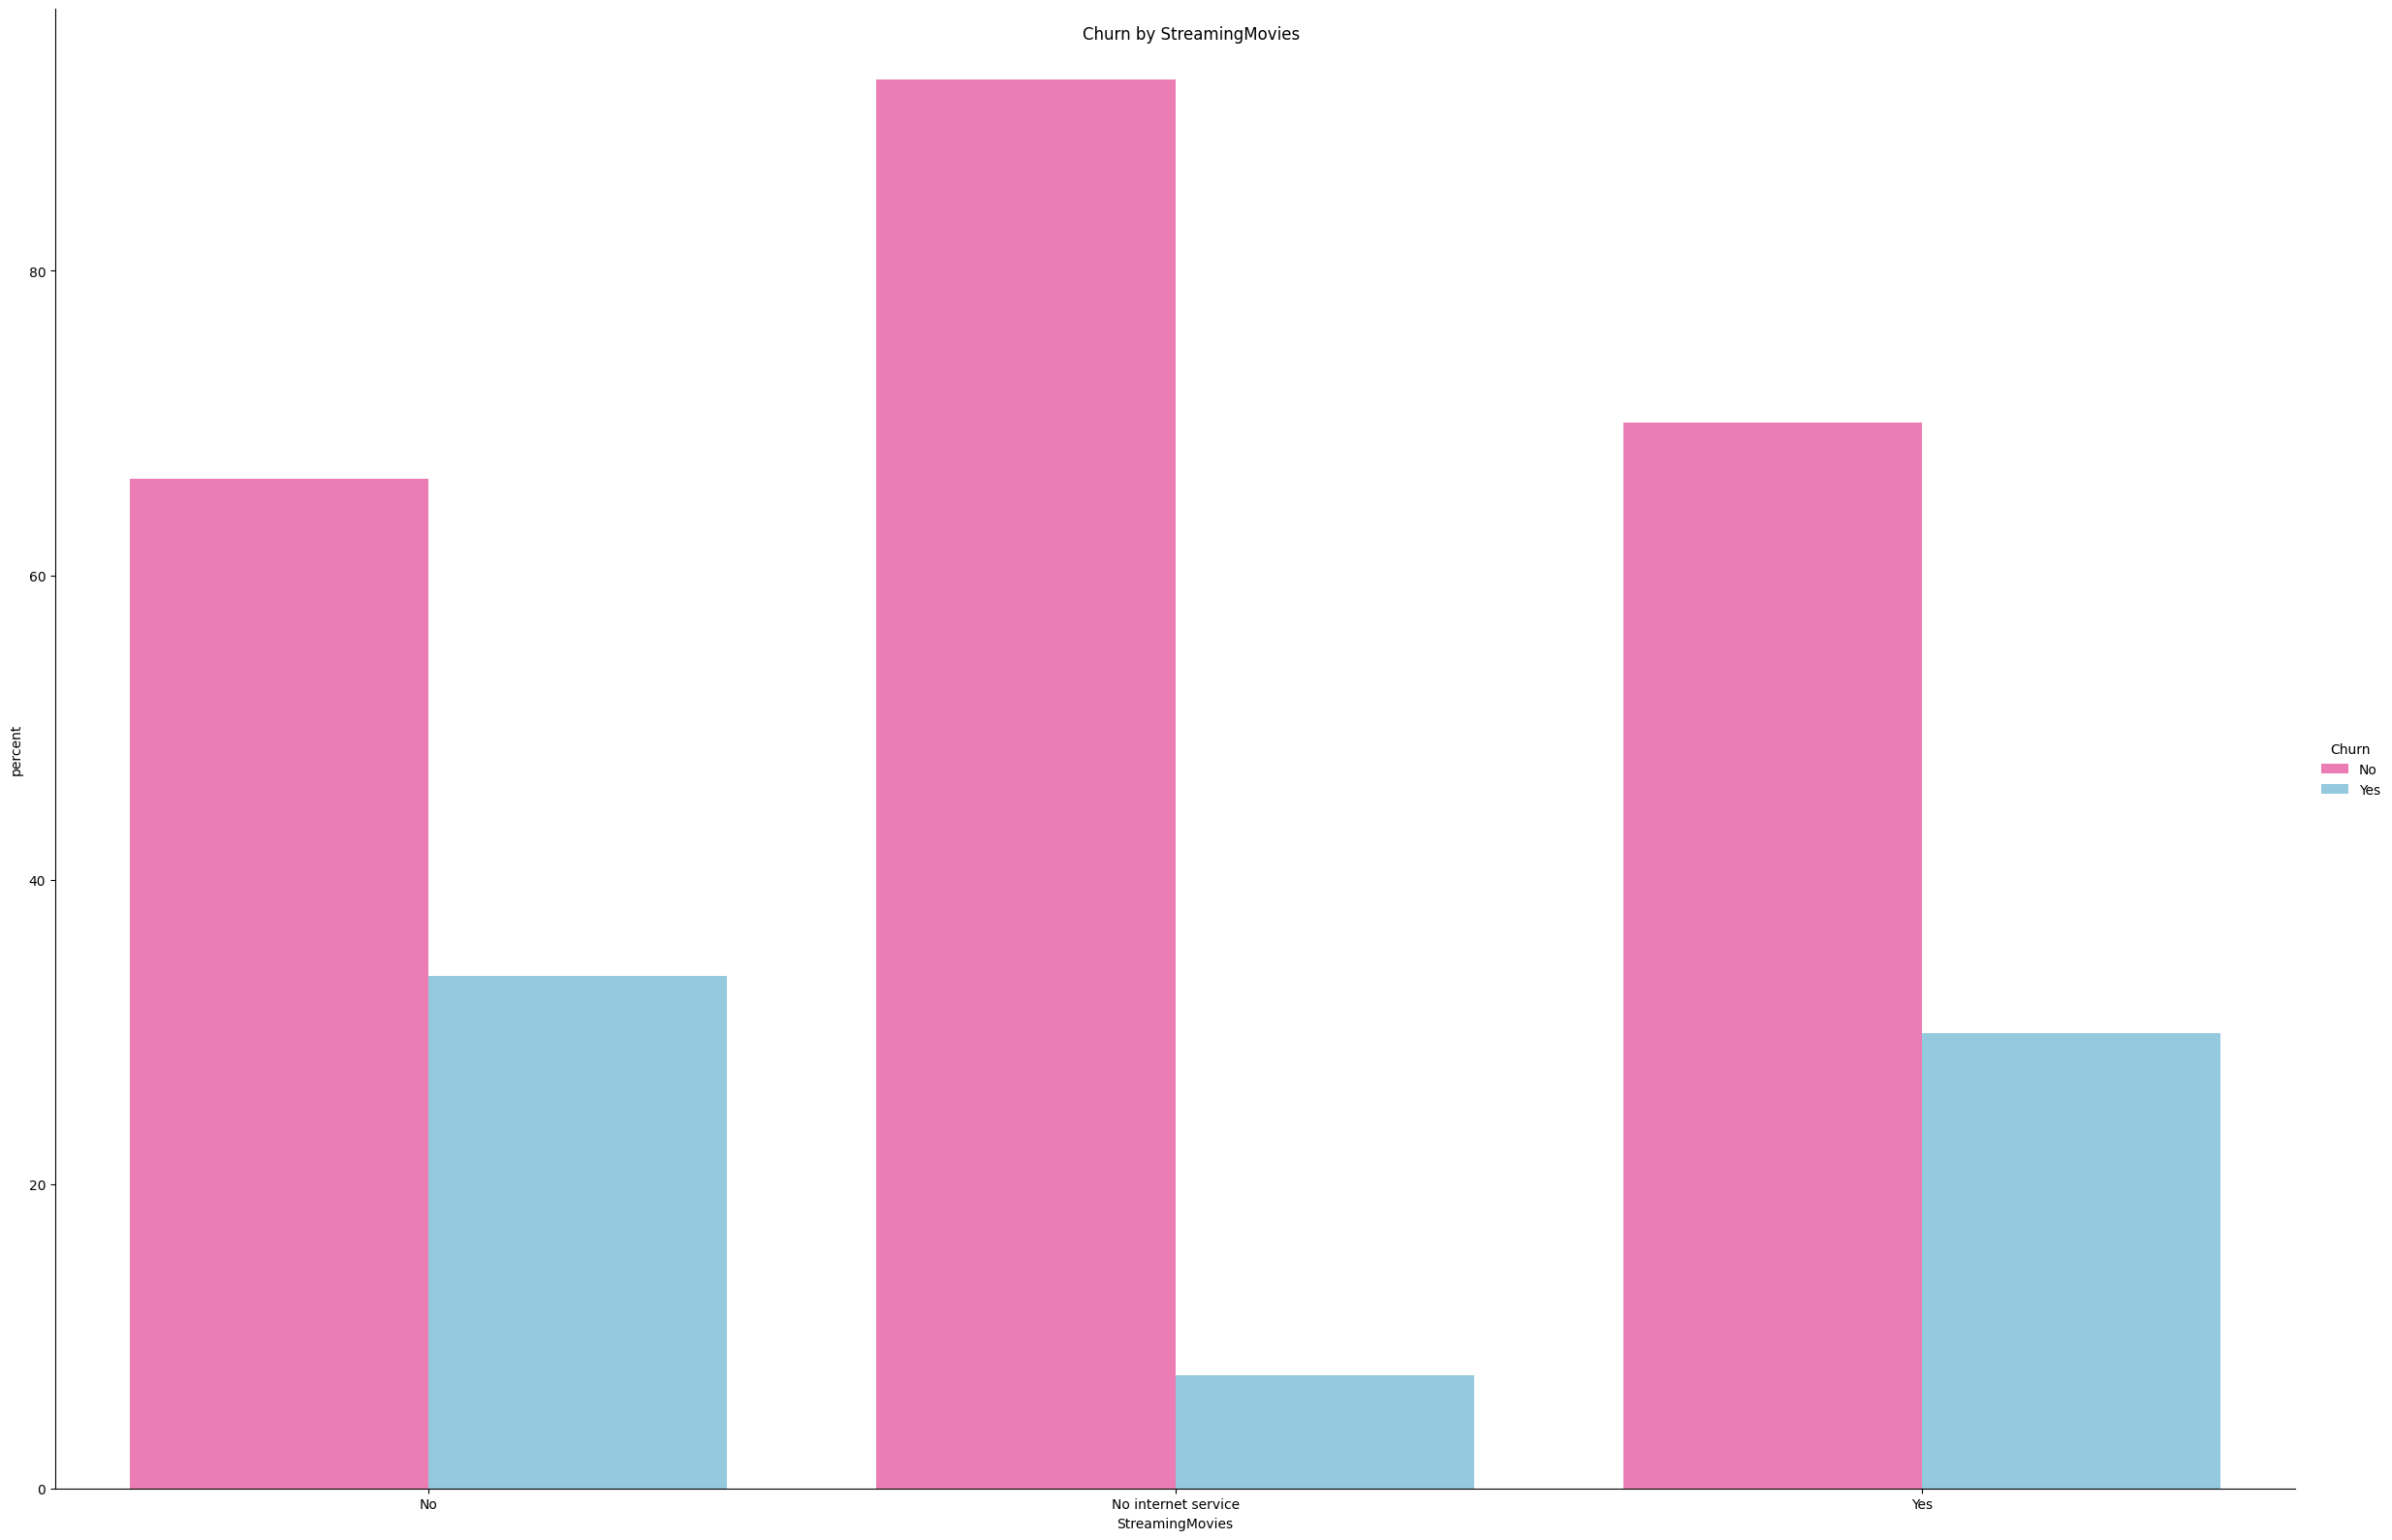

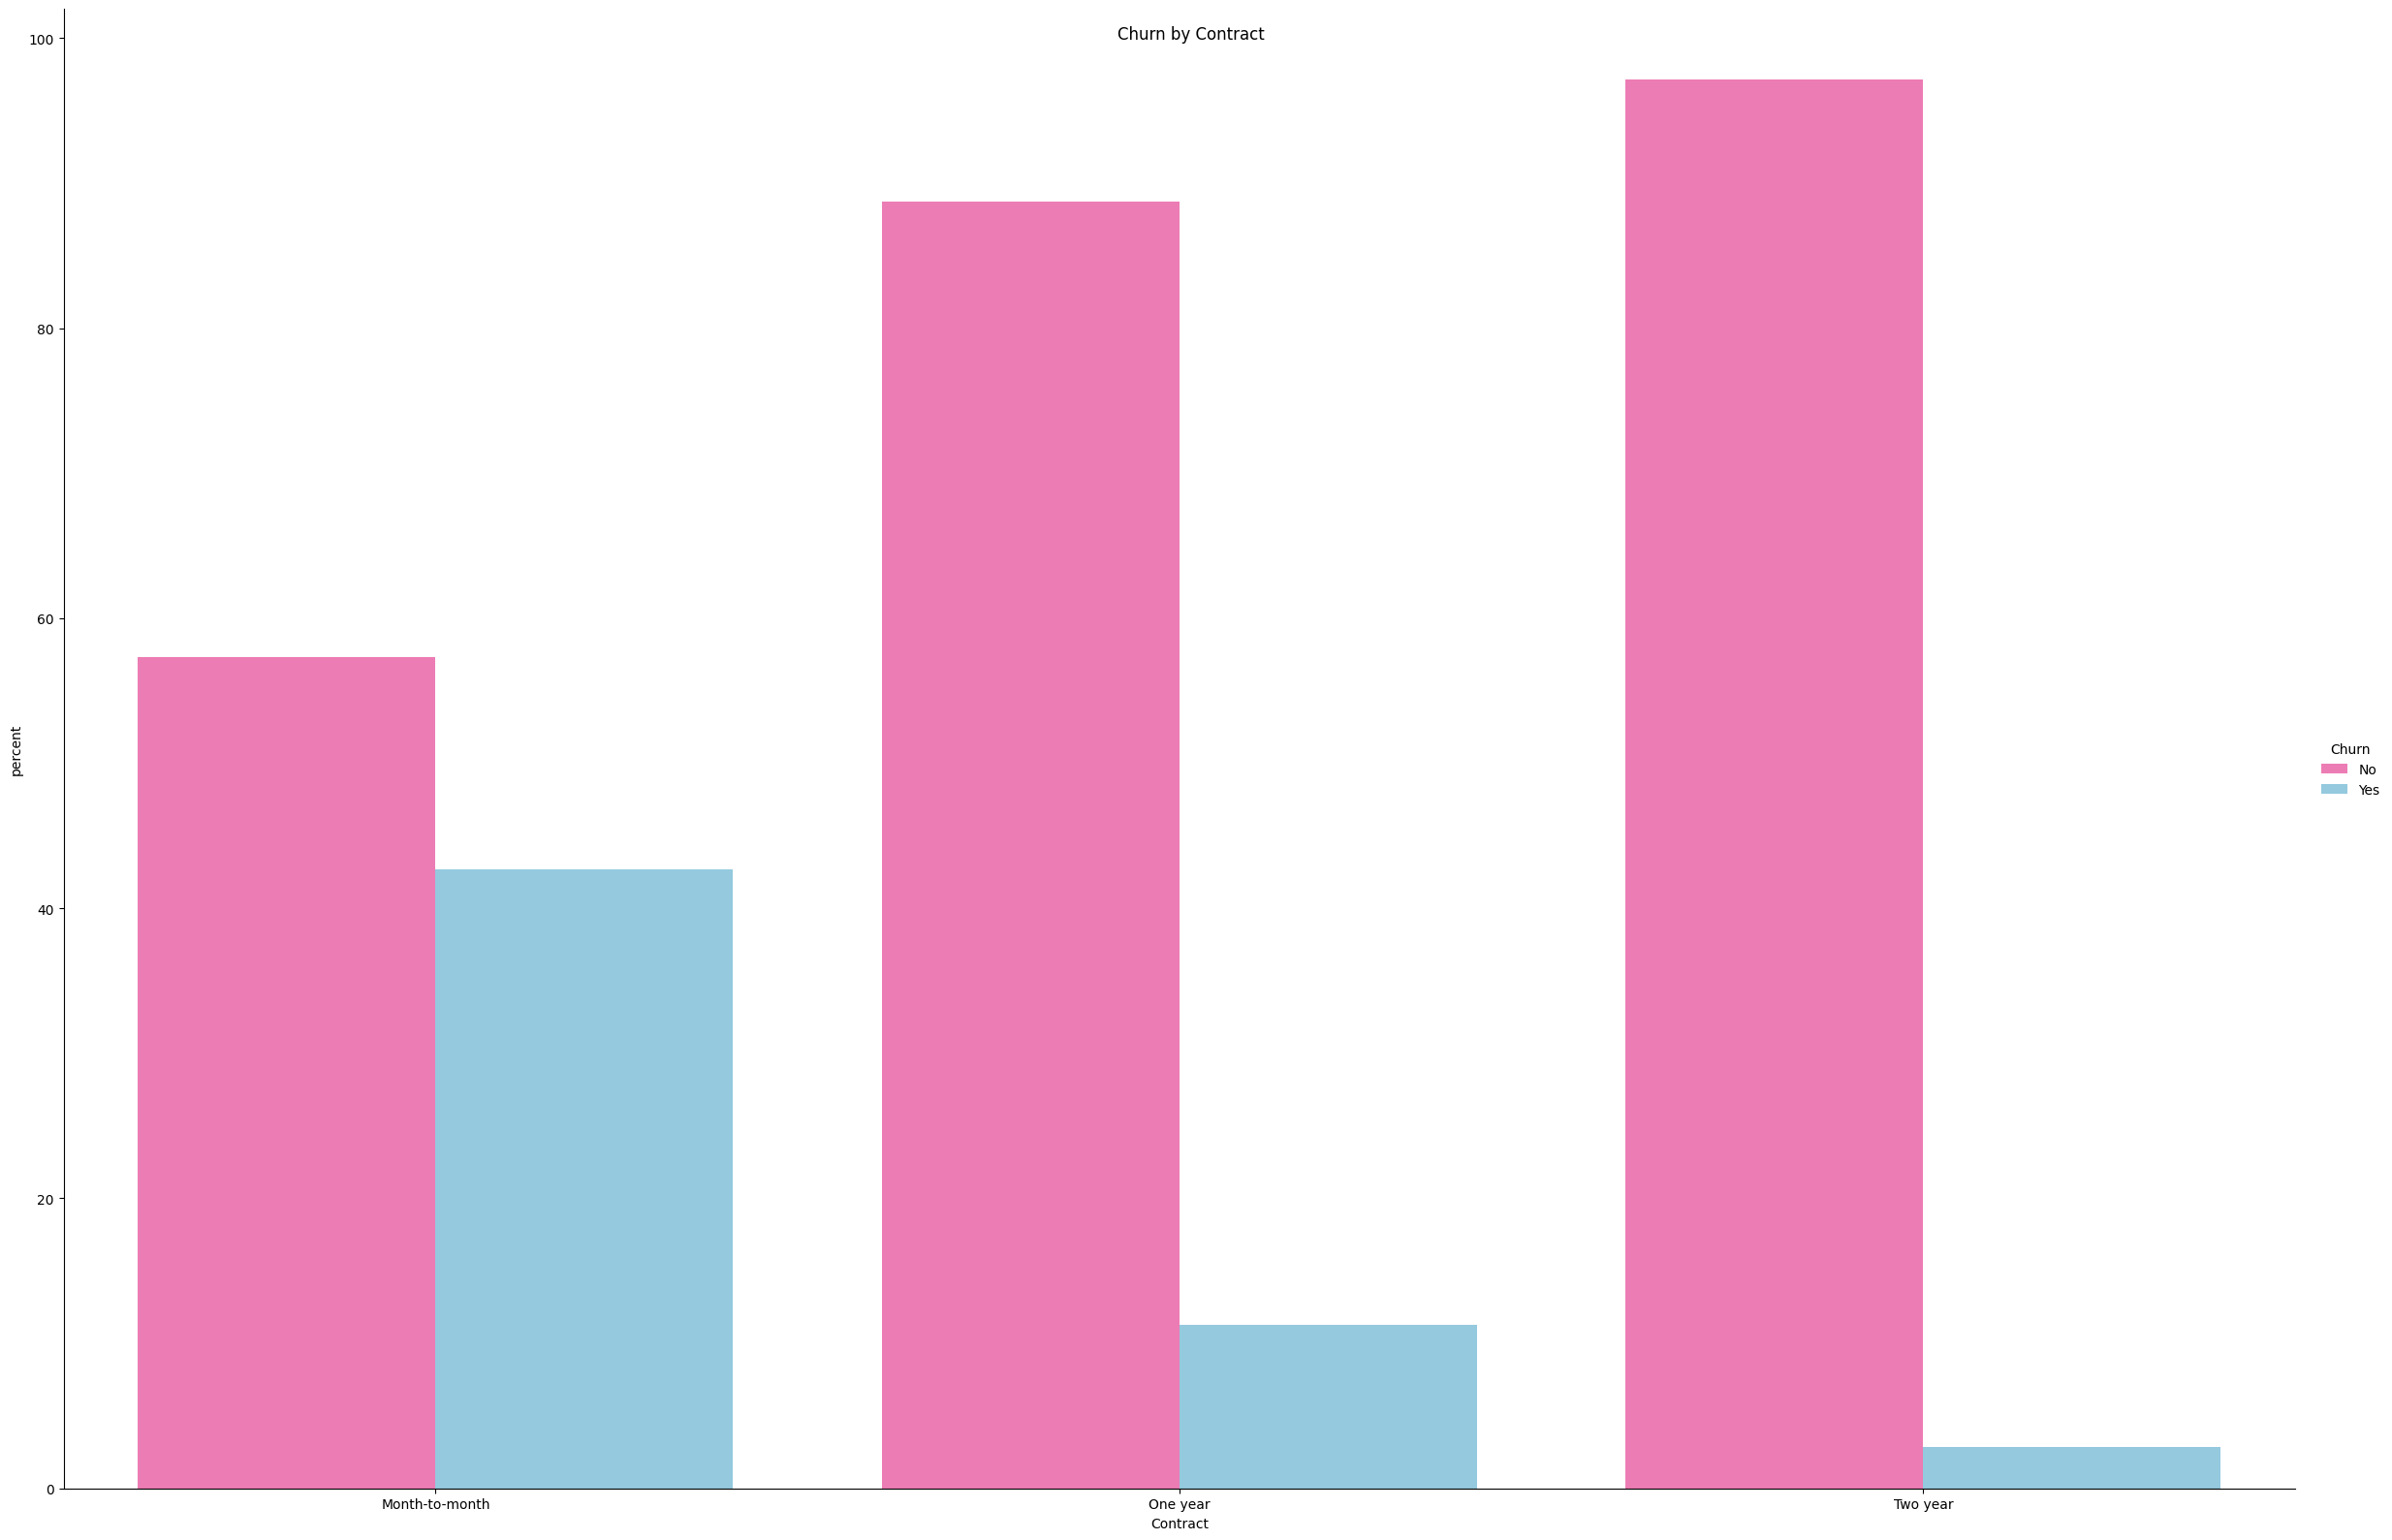

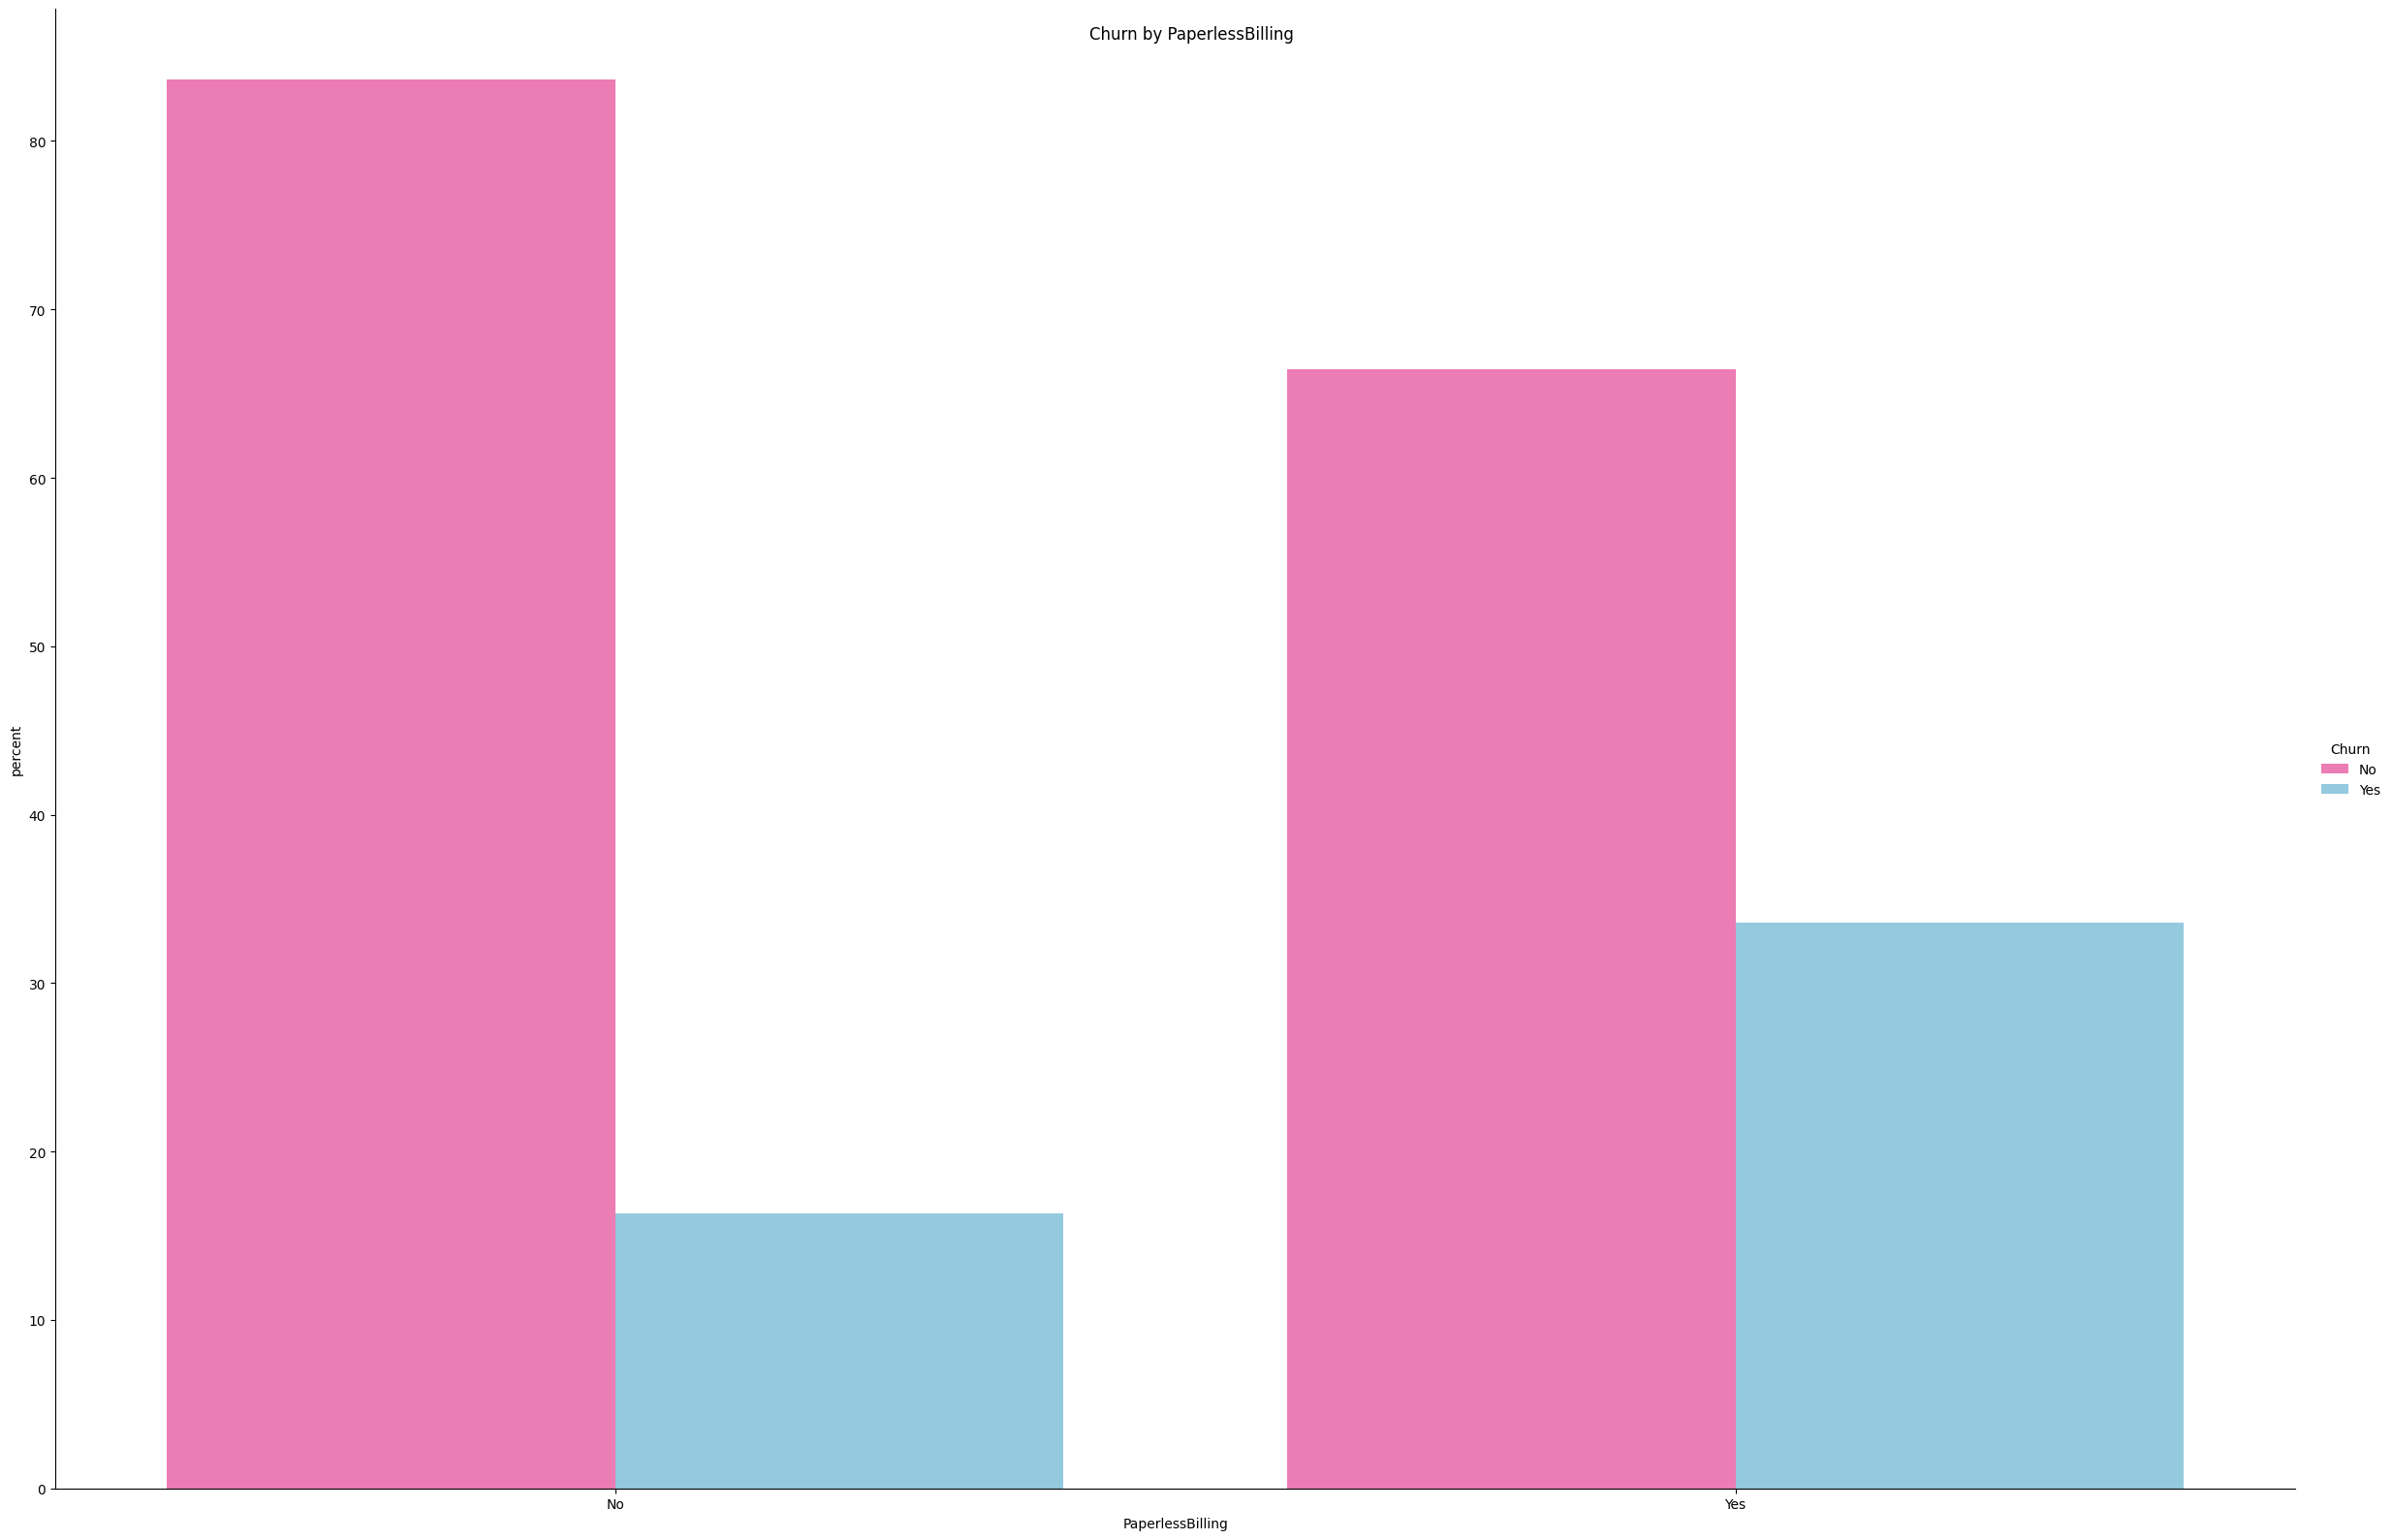

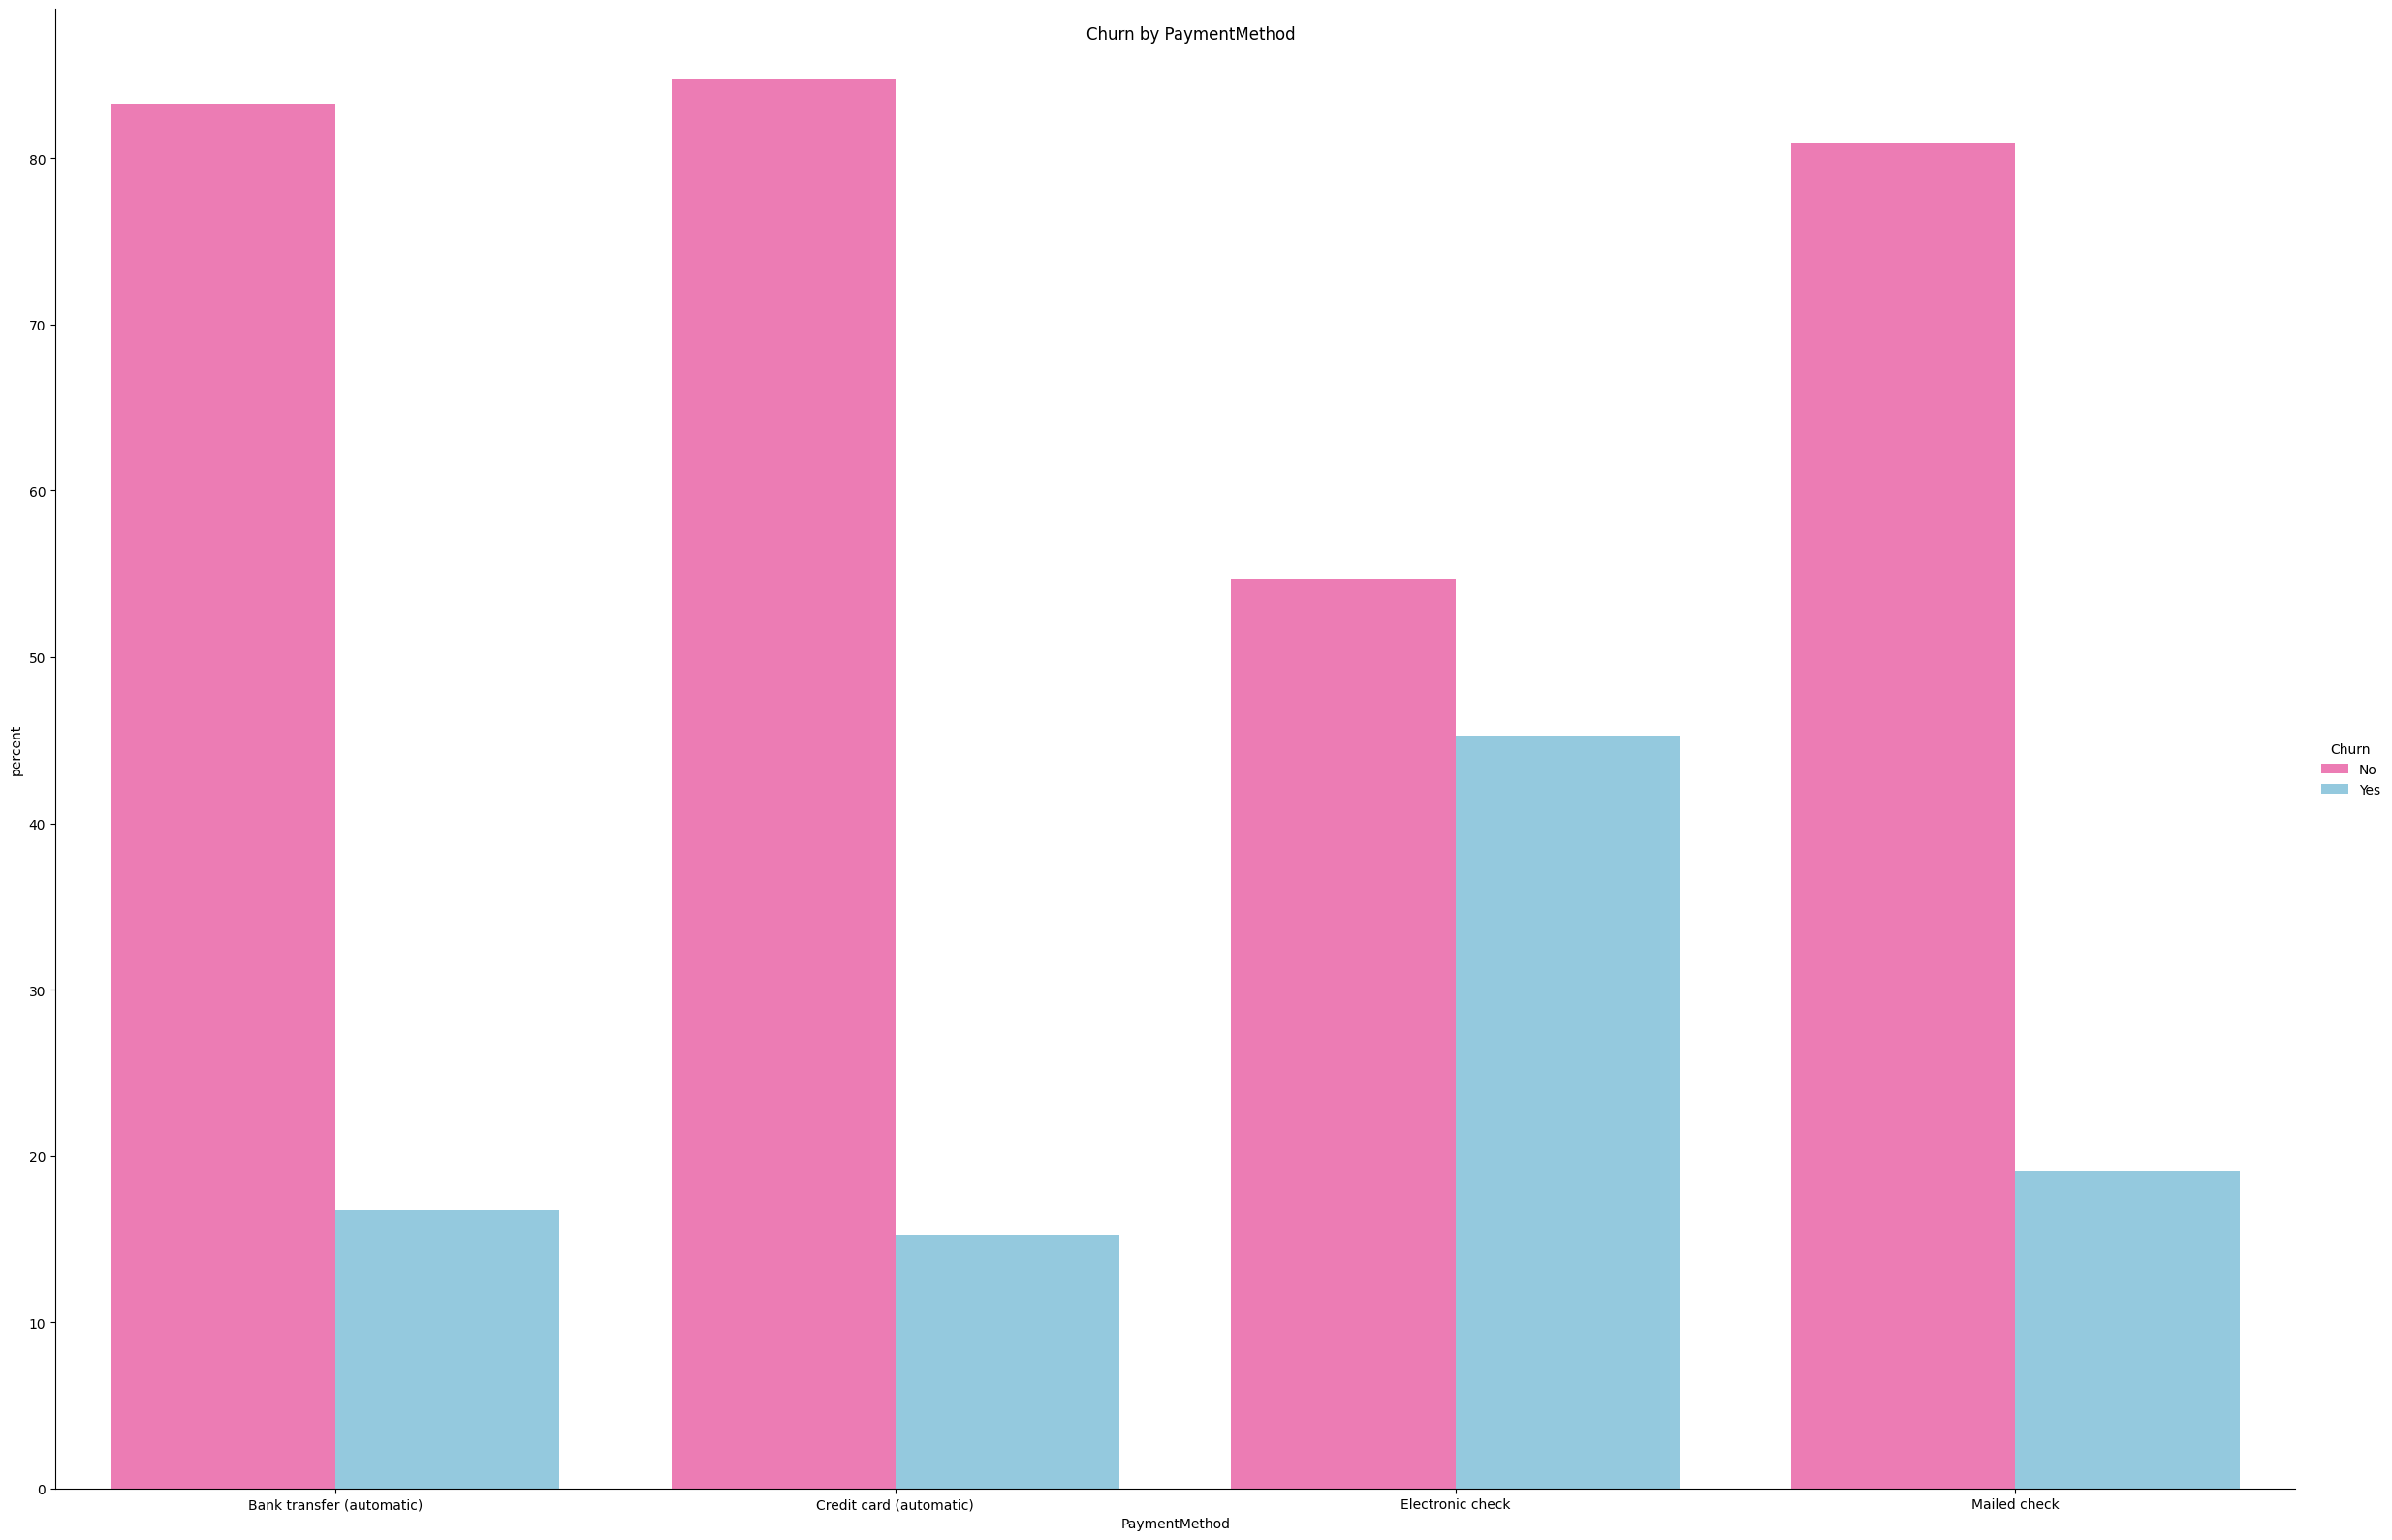

In [22]:
y = 'Churn'

for x in catvars:
    plot = df1.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar',palette=["hotpink", "#87ceeb"], height = 16, aspect = 1.5)
    plot.fig.suptitle("Churn by " + x)
    plot

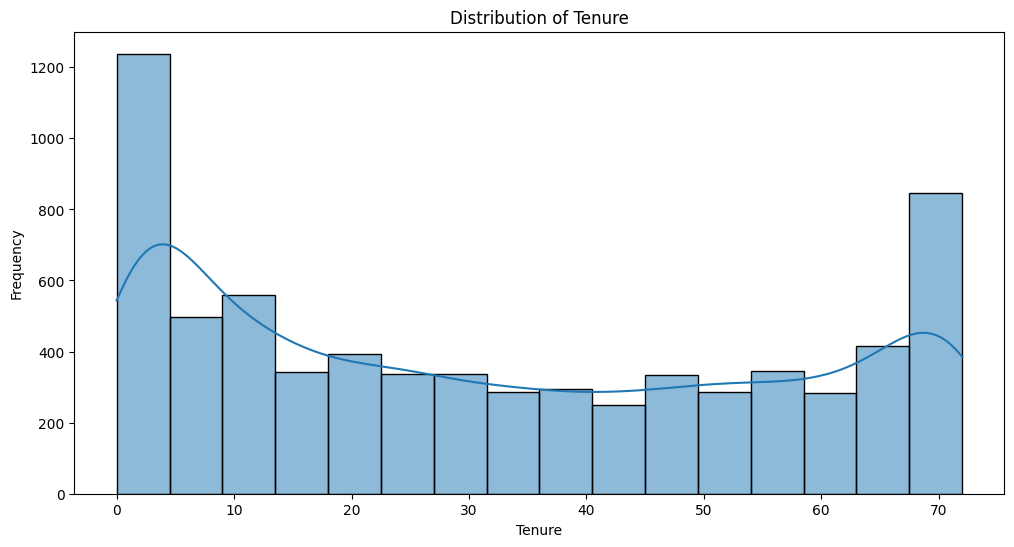

In [23]:
#Tenure -> hizmet süresi

plt.figure(figsize=(12,6))
sns.histplot(df1.tenure, kde="True")
plt.title('Distribution of Tenure') 
plt.xlabel('Tenure') 
plt.ylabel('Frequency') 
plt.show()

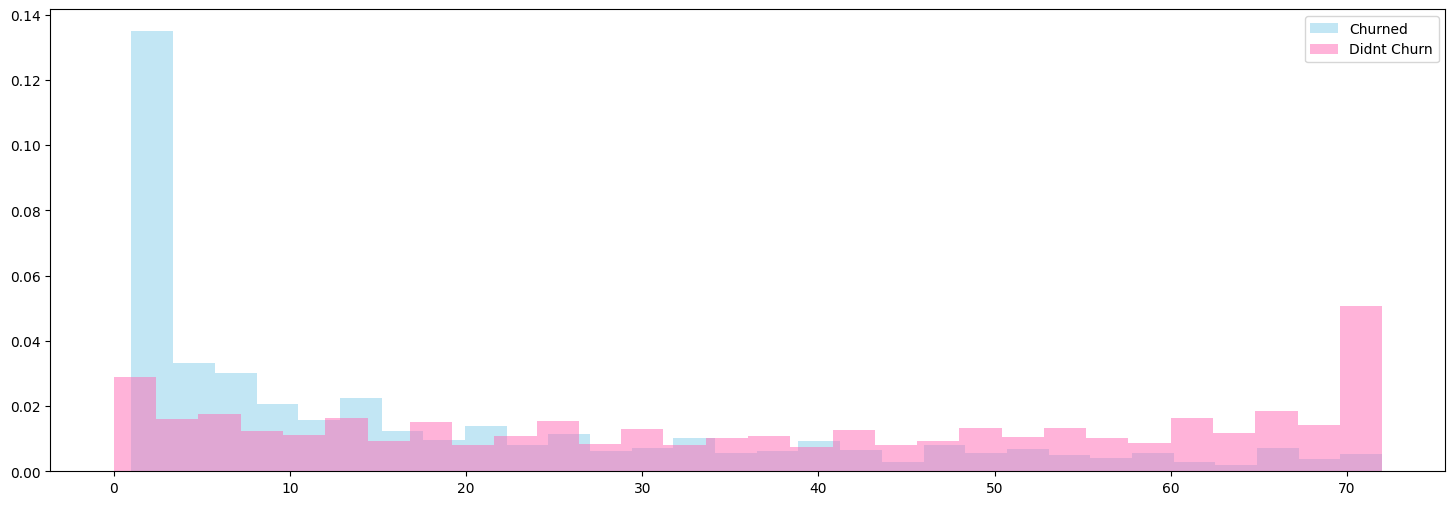

In [24]:
# Churn by tenure

plt.figure(figsize=(18,6))

bins = 30
plt.hist(df1[df1.Churn == 'Yes'].tenure, bins, alpha=0.5, density= True, label='Churned', color = 'skyblue')
plt.hist(df1[df1.Churn == 'No'].tenure, bins, alpha = 0.5, density =True, label='Didnt Churn', color='hotpink') 

plt.legend(loc='upper right')
plt.show()




In [25]:

# Churn müşterilerinin sayısını al
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

# Churn müşterilerini seç
churners = df[df['Churn'] == 1]

# Churn olmayan müşterilerden rastgele örnek al
non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))

# Churn ve churn olmayan müşterileri birleştir
df3 = pd.concat([churners, non_churners])



Number of churners 1869
Number of non-churners 1869


In [26]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (30,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

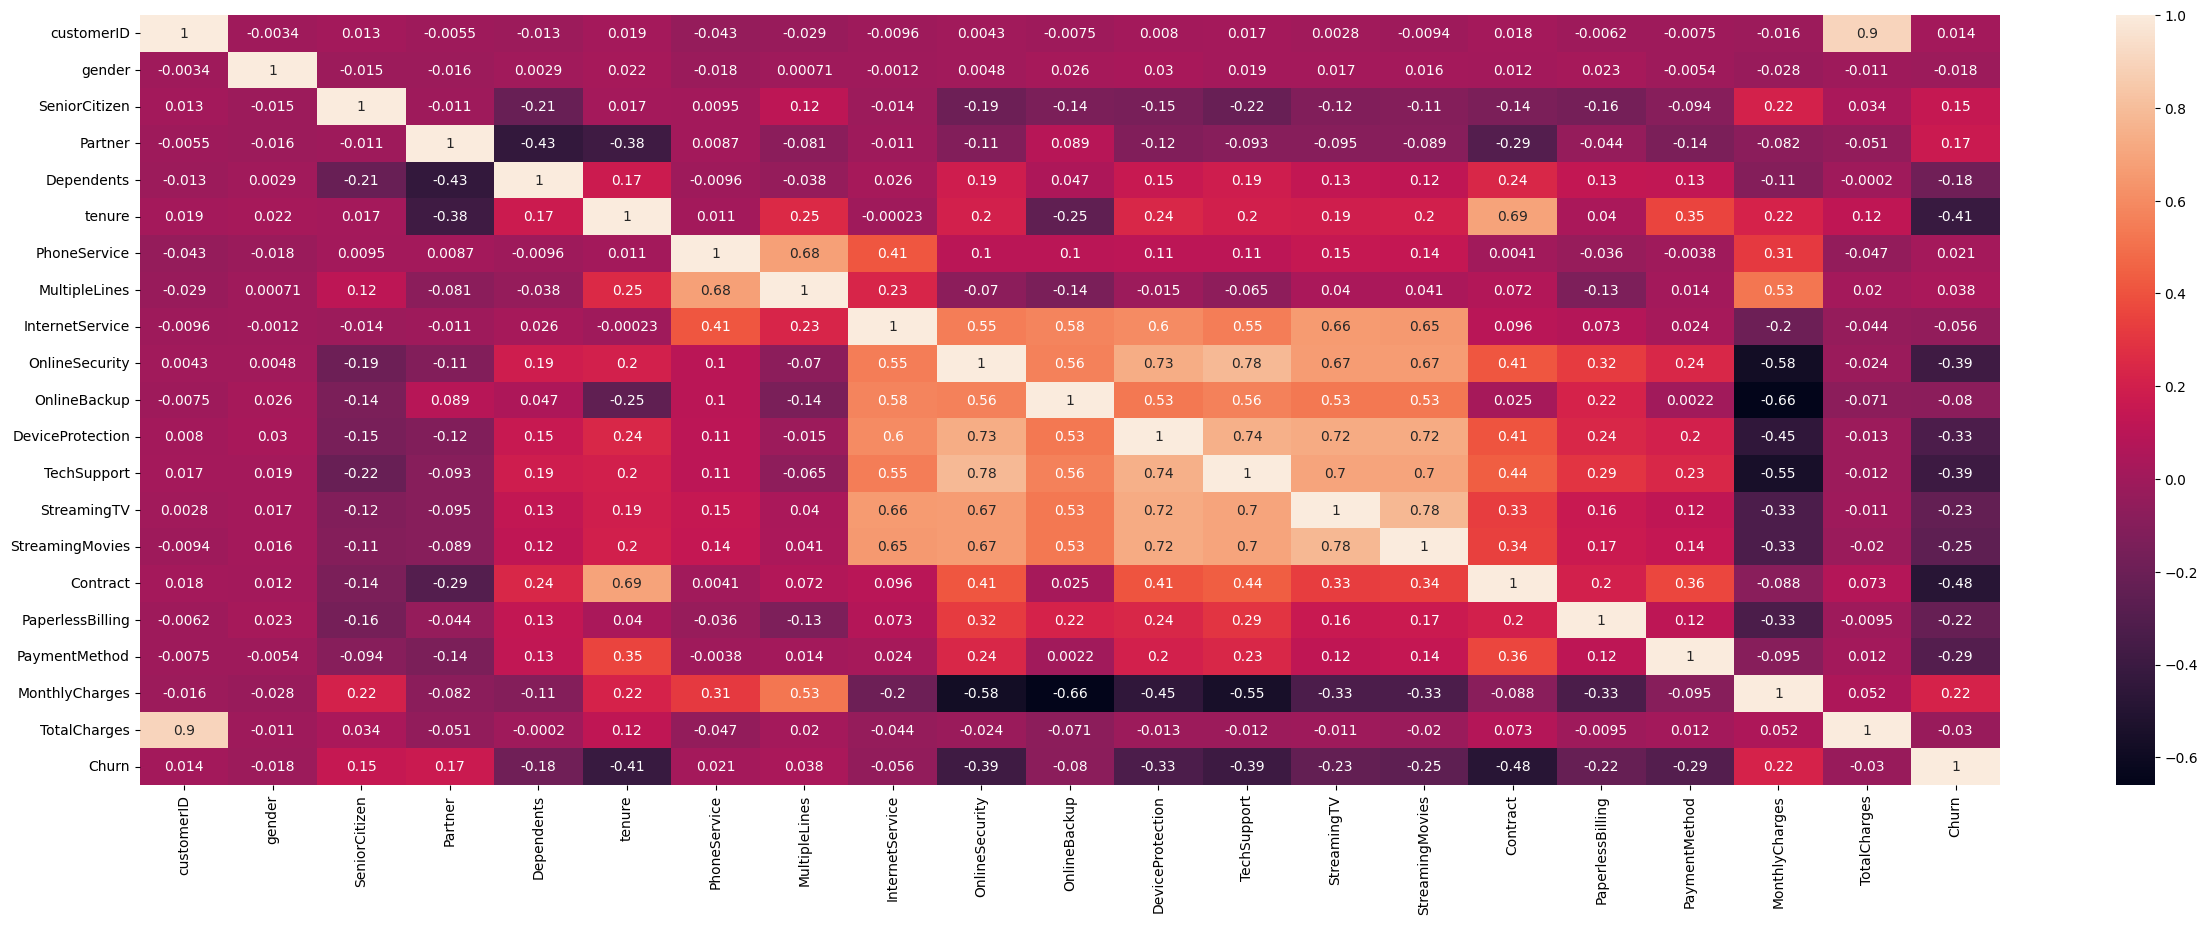

In [27]:
correlation_df = show_correlations(df3,show_chart=True)

In [28]:
# Define the target variable (dependent variable) 
y = df.Churn 
df = df.drop(['Churn'], axis= 1)

In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,6526
7039,7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,6527
7040,7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,6528
7041,7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,6529


In [30]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20)  

In [ ]:
# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', degree=8)  
svclassifier.fit(X_train, y_train)

In [ ]:
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test) 

In [ ]:
# Evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))